In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
import sklearn.datasets as dta
from matplotlib import font_manager as fm

In [2]:
# Read in Affinity, COVID-19, and GeoID Data
affinity_df = pd.read_csv('Data/Affinity-State-Daily.csv')
covid_df = pd.read_csv('Data/COVID_Cases-State-Daily.csv')
covid_nat_df = pd.read_csv('Data/COVID_Cases-National-Daily.csv')
affinity_nat_df = pd.read_csv('Data/Affinity-National-Daily.csv')
geoids_df = pd.read_csv('Data/GeoIDs-State.csv')
uic_df = pd.read_csv('Data/UI_Claims-State-Weekly.csv')
cases_df=pd.read_csv('Data/US_MAP_DATA (1).csv')

In [3]:
# Check variable counts

#affinity_nat_dff.count()
#affinity_state_dff.count()
#covid_nat_df.count()
#covid_state_df.count()
geoids_df.count()

statefips        51
statename        51
stateabbrev      51
state_pop2019    51
dtype: int64

In [4]:
# Check data types
geoids_df.dtypes

statefips         int64
statename        object
stateabbrev      object
state_pop2019     int64
dtype: object

In [5]:
# Create an date variable based on year, month, and day variables
affinity_nat_date = pd.to_datetime(affinity_nat_df[['year', 'month', 'day']])
affinity_nat_date.head()

0   2020-01-24
1   2020-01-25
2   2020-01-26
3   2020-01-27
4   2020-01-28
dtype: datetime64[ns]

In [6]:
# add date column and create a national state id and name in covid_nat_df
# also organize columns
affinity_nat_df["date"] = affinity_nat_date
affinity_nat_df["statefips"] = 0
affinity_nat_df["statename"] = 'National'
affinity_nat_df = affinity_nat_df[ ['date','year','month','day','statefips','statename','spend_acf','spend_aer',
                                   'spend_all','spend_all_inchigh','spend_all_inclow','spend_all_incmiddle','spend_apg',
                                   'spend_grf','spend_hcs','spend_tws'] ]
affinity_nat_df.head()

,date,year,month,day,statefips,statename,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-24,2020,1,24,0,National,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
1,2020-01-25,2020,1,25,0,National,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839
2,2020-01-26,2020,1,26,0,National,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720
3,2020-01-27,2020,1,27,0,National,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700
4,2020-01-28,2020,1,28,0,National,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870


In [7]:
# Create an date variable
covid_nat_date = pd.to_datetime(covid_nat_df[['year', 'month', 'day']])
covid_nat_date.head()

0   2020-01-21
1   2020-01-22
2   2020-01-23
3   2020-01-24
4   2020-01-25
dtype: datetime64[ns]

In [8]:
# add date column and create a national state id and name in covid_nat_df
covid_nat_df["date"] = covid_nat_date
covid_nat_df["statefips"] = 0
covid_nat_df["statename"] = 'National'
covid_nat_df = covid_nat_df[ ['date','year','month','day','statefips','statename','case_rate','new_case_rate'] ]
covid_nat_df.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate
0,2020-01-21,2020,1,21,0,National,0.000305,.
1,2020-01-22,2020,1,22,0,National,0.000305,.
2,2020-01-23,2020,1,23,0,National,0.000305,.
3,2020-01-24,2020,1,24,0,National,0.000609,.
4,2020-01-25,2020,1,25,0,National,0.000914,.


In [9]:
# Merge national covid-19 data with national affinity (spending) data
merge0_df = pd.merge(covid_nat_df, affinity_nat_df, on=["date", "statefips"], how="left")
merge0_df.head()

,date,year_x,month_x,day_x,statefips,statename_x,case_rate,new_case_rate,year_y,month_y,...,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-21,2020,1,21,0,National,0.000305,.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-22,2020,1,22,0,National,0.000305,.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-23,2020,1,23,0,National,0.000305,.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-24,2020,1,24,0,National,0.000609,.,2020.0,1.0,...,-0.00510,-0.0236,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
4,2020-01-25,2020,1,25,0,National,0.000914,.,2020.0,1.0,...,0.00202,-0.0182,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839


In [10]:
# Remove rows with missing data
merge0_df = merge0_df.dropna(how='any')
merge0_df.head()

,date,year_x,month_x,day_x,statefips,statename_x,case_rate,new_case_rate,year_y,month_y,...,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
3,2020-01-24,2020,1,24,0,National,0.000609,.,2020.0,1.0,...,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
4,2020-01-25,2020,1,25,0,National,0.000914,.,2020.0,1.0,...,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839
5,2020-01-26,2020,1,26,0,National,0.001520,.,2020.0,1.0,...,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720
6,2020-01-27,2020,1,27,0,National,0.001520,0.000174,2020.0,1.0,...,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700
7,2020-01-28,2020,1,28,0,National,0.001520,0.000174,2020.0,1.0,...,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870


In [11]:
# Drop dup columns from merge
merge0_df.drop(['year_y', 'month_y', 'day_y','statename_y'], axis=1, inplace=True)
merge0_df.head()

,date,year_x,month_x,day_x,statefips,statename_x,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
3,2020-01-24,2020,1,24,0,National,0.000609,.,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
4,2020-01-25,2020,1,25,0,National,0.000914,.,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839
5,2020-01-26,2020,1,26,0,National,0.001520,.,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720
6,2020-01-27,2020,1,27,0,National,0.001520,0.000174,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700
7,2020-01-28,2020,1,28,0,National,0.001520,0.000174,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870


In [12]:
# Rename dup columns that were from merge 
merge0_df = merge0_df.rename(columns={"year_x": "year", "month_x": "month", "day_x": "day","statename_x": "statename"})
merge0_df["case_rate"] = merge0_df["case_rate"].astype('float')
merge0_df["spend_all_inchigh"] = merge0_df["spend_all_inchigh"].astype('float')
merge0_df["spend_all_inclow"] = merge0_df["spend_all_inclow"].astype('float')
merge0_df.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
3,2020-01-24,2020,1,24,0,National,0.000609,.,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
4,2020-01-25,2020,1,25,0,National,0.000914,.,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839
5,2020-01-26,2020,1,26,0,National,0.001520,.,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720
6,2020-01-27,2020,1,27,0,National,0.001520,0.000174,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700
7,2020-01-28,2020,1,28,0,National,0.001520,0.000174,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870


In [13]:
# Create an date variable based on year, month, and day variables
affinity_date = pd.to_datetime(affinity_df[['year', 'month', 'day']])
affinity_date.head()

0   2020-01-24
1   2020-01-24
2   2020-01-24
3   2020-01-24
4   2020-01-24
dtype: datetime64[ns]

In [14]:
# Add and move the new date variable to the first column in the affinity stat df
affinity_df["date"] = affinity_date
affinity_df = affinity_df[ ['date'] + [ col for col in affinity_df.columns if col != 'date' ] ]
affinity_df.head()

,date,year,month,day,statefips,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-24,2020,1,24,1,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.05700,-0.01760
1,2020-01-24,2020,1,24,2,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.15400,-0.07230
2,2020-01-24,2020,1,24,4,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.02070,-0.04610
3,2020-01-24,2020,1,24,5,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.00586,0.00444
4,2020-01-24,2020,1,24,6,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.02030,-0.00473


In [15]:
# Create an date variable based on year, month, and day variables
covid_date = pd.to_datetime(covid_df[['year', 'month', 'day']])
covid_date.head()

0   2020-01-21
1   2020-01-21
2   2020-01-21
3   2020-01-21
4   2020-01-21
dtype: datetime64[ns]

In [16]:
# Add and move the new date variable to the first column in the covid stat df
covid_df["date"] = covid_date
covid_df = covid_df[ ['date'] + [ col for col in covid_df.columns if col != 'date' ] ]
covid_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate
0,2020-01-21,2020,1,21,1,0.0,.
1,2020-01-21,2020,1,21,2,0.0,.
2,2020-01-21,2020,1,21,4,0.0,.
3,2020-01-21,2020,1,21,5,0.0,.
4,2020-01-21,2020,1,21,6,0.0,.


In [17]:
# Merge covid state and affinity state dataframes
merge1_df = pd.merge(covid_df, affinity_df, on=["date", "statefips"], how="left")
merge1_df.head()

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,year_y,month_y,day_y,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-21,2020,1,21,1,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-21,2020,1,21,2,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-21,2020,1,21,4,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-21,2020,1,21,5,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-21,2020,1,21,6,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Drop rows with missing data
merge1_df = merge1_df.dropna(how='any')
merge1_df.head()

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,year_y,month_y,day_y,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
153,2020-01-24,2020,1,24,1,0.0,.,2020.0,1.0,24.0,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.05700,-0.01760
154,2020-01-24,2020,1,24,2,0.0,.,2020.0,1.0,24.0,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.15400,-0.07230
155,2020-01-24,2020,1,24,4,0.0,.,2020.0,1.0,24.0,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.02070,-0.04610
156,2020-01-24,2020,1,24,5,0.0,.,2020.0,1.0,24.0,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.00586,0.00444
157,2020-01-24,2020,1,24,6,0.0,.,2020.0,1.0,24.0,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.02030,-0.00473


In [19]:
# Merge merge1 (affinity state and covid state) with geoids (state lookup tbl)
merge2_df = pd.merge(merge1_df, geoids_df, on="statefips", how="left")
merge2_df.drop(['year_y', 'month_y', 'day_y'], axis=1, inplace=True)
merge2_df.head()

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,1,0.0,.,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.05700,-0.01760,Alabama,AL,4903185
1,2020-01-24,2020,1,24,2,0.0,.,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.15400,-0.07230,Alaska,AK,731545
2,2020-01-24,2020,1,24,4,0.0,.,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.02070,-0.04610,Arizona,AZ,7278717
3,2020-01-24,2020,1,24,5,0.0,.,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.00586,0.00444,Arkansas,AR,3017804
4,2020-01-24,2020,1,24,6,0.0,.,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.02030,-0.00473,California,CA,39512223


In [20]:
# Rename dup columns due to the merge of merge1_df and geoids_df
merge2_df = merge2_df.rename(columns={"year_x": "year", "month_x": "month", "day_x": "day"})
merge2_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,1,0.0,.,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.05700,-0.01760,Alabama,AL,4903185
1,2020-01-24,2020,1,24,2,0.0,.,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.15400,-0.07230,Alaska,AK,731545
2,2020-01-24,2020,1,24,4,0.0,.,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.02070,-0.04610,Arizona,AZ,7278717
3,2020-01-24,2020,1,24,5,0.0,.,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.00586,0.00444,Arkansas,AR,3017804
4,2020-01-24,2020,1,24,6,0.0,.,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.02030,-0.00473,California,CA,39512223


## Q1: How consumer spending of different industries has changed and if certain industries were particularly hit hard by COVID-19?

In [21]:
jun17_df = merge2_df[merge2_df['date'] == '2020-06-17']
jun17_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
7395,2020-06-17,2020,6,17,1,557.0,15.5,-0.210,-0.382,-0.0191,-0.11,0.00901,-0.0192,0.0529,0.0597,-0.1230,-0.456,Alabama,AL,4903185
7396,2020-06-17,2020,6,17,2,106.0,2.62,-0.308,-0.368,-0.1290,-0.128,.,-0.1380,0.0331,0.0104,-0.3390,-0.513,Alaska,AK,731545
7397,2020-06-17,2020,6,17,4,565.0,21.9,-0.402,-0.391,-0.1170,-0.13,-0.137,-0.1040,-0.1520,0.0532,-0.1300,-0.495,Arizona,AZ,7278717
7398,2020-06-17,2020,6,17,5,451.0,15.3,-0.245,-0.415,0.0145,-0.159,0.0192,0.0233,0.0752,0.0721,-0.0493,-0.542,Arkansas,AR,3017804
7399,2020-06-17,2020,6,17,6,413.0,8.4,-0.473,-0.603,-0.1790,-0.187,-0.172,-0.1650,-0.2250,0.0841,-0.1650,-0.580,California,CA,39512223


In [22]:
jun17_sorted = jun17_df.sort_values('case_rate',ascending = False)
top_five_states=jun17_sorted.iloc[0:5]
top_five_states_df=pd.DataFrame(top_five_states)
top_five_states_df

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
7427,2020-06-17,2020,6,17,36,2004.0,3.65,-0.420,-0.563,-0.0891,-0.127,-0.0501,-0.0603,-0.1630,0.0962,-0.217,-0.491,New York,NY,19453561
7425,2020-06-17,2020,6,17,34,1888.0,3.79,-0.414,-0.400,-0.0762,-0.107,-0.00771,-0.0377,-0.1850,0.1720,-0.168,-0.525,New Jersey,NJ,8882190
7416,2020-06-17,2020,6,17,25,1540.0,4.13,-0.408,-0.530,-0.0797,-0.108,-0.0259,-0.0254,0.0354,0.0994,-0.243,-0.520,Massachusetts,MA,6892503
7434,2020-06-17,2020,6,17,44,1530.0,6.16,-0.565,-0.420,-0.1980,-0.205,-0.161,-0.2040,-0.1180,0.0079,-0.216,-0.552,Rhode Island,RI,1059361
7403,2020-06-17,2020,6,17,11,1395.0,6.27,-0.569,-0.569,-0.2110,-0.243,-0.0304,-0.2030,-0.1380,0.2120,-0.224,-0.760,District Of Columbia,DC,705749


In [23]:
florida_df = jun17_df.loc[jun17_df["statename"] == "Florida"]
florida_df

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
7404,2020-06-17,2020,6,17,12,385.0,10.2,-0.245,-0.417,-0.0432,-0.0836,-0.0211,-0.0413,-0.0234,0.0641,-0.0424,-0.449,Florida,FL,21477737


In [24]:
top5_fl = top_five_states_df.append(florida_df, sort=False)
top5_fl

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
7427,2020-06-17,2020,6,17,36,2004.0,3.65,-0.420,-0.563,-0.0891,-0.127,-0.0501,-0.0603,-0.1630,0.0962,-0.2170,-0.491,New York,NY,19453561
7425,2020-06-17,2020,6,17,34,1888.0,3.79,-0.414,-0.400,-0.0762,-0.107,-0.00771,-0.0377,-0.1850,0.1720,-0.1680,-0.525,New Jersey,NJ,8882190
7416,2020-06-17,2020,6,17,25,1540.0,4.13,-0.408,-0.530,-0.0797,-0.108,-0.0259,-0.0254,0.0354,0.0994,-0.2430,-0.520,Massachusetts,MA,6892503
7434,2020-06-17,2020,6,17,44,1530.0,6.16,-0.565,-0.420,-0.1980,-0.205,-0.161,-0.2040,-0.1180,0.0079,-0.2160,-0.552,Rhode Island,RI,1059361
7403,2020-06-17,2020,6,17,11,1395.0,6.27,-0.569,-0.569,-0.2110,-0.243,-0.0304,-0.2030,-0.1380,0.2120,-0.2240,-0.760,District Of Columbia,DC,705749
7404,2020-06-17,2020,6,17,12,385.0,10.2,-0.245,-0.417,-0.0432,-0.0836,-0.0211,-0.0413,-0.0234,0.0641,-0.0424,-0.449,Florida,FL,21477737


In [25]:
top5_list=['New York','New Jersey','Massachusetts','Rhode Island','District Of Columbia','Florida']
top5_df = merge2_df[merge2_df['statename'].isin(top5_list)]
top5_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
8,2020-01-24,2020,1,24,11,0.0,.,-0.00066,0.00528,-0.00252,0.00384,-0.0491,-0.00417,-0.04930,-0.00575,0.1290,0.01150,District Of Columbia,DC,705749
9,2020-01-24,2020,1,24,12,0.0,.,-0.01970,-0.04380,-0.01450,-0.0133,-0.0249,-0.01070,-0.00964,-0.01100,-0.0186,-0.00569,Florida,FL,21477737
21,2020-01-24,2020,1,24,25,0.0,.,0.02580,-0.04450,-0.00358,-0.00764,-0.0126,0.00507,0.03550,-0.03080,0.0485,-0.03790,Massachusetts,MA,6892503
30,2020-01-24,2020,1,24,34,0.0,.,-0.00736,0.01600,-0.00548,-0.00759,0.00563,-0.00414,-0.00722,-0.02020,-0.0451,0.00592,New Jersey,NJ,8882190
32,2020-01-24,2020,1,24,36,0.0,.,0.00214,-0.03430,-0.00610,-0.00332,0.00127,-0.01040,0.01430,-0.02250,-0.0316,0.06060,New York,NY,19453561


In [26]:
eom_df =top5_df[top5_df['date'].isin(['2020-01-31', '2020-02-28', '2020-03-31','2020-04-30','2020-05-31','2020-06-17'])]
eom_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
365,2020-01-31,2020,1,31,11,0.0,0,-0.0608,0.011300,-0.01250,-0.0225,-0.0227,0.04720,-0.01470,-0.00464,0.01430,0.0490,District Of Columbia,DC,705749
366,2020-01-31,2020,1,31,12,0.0,0,0.0140,0.032300,0.00720,-0.0024,0.0217,0.00407,0.02200,0.01750,-0.01230,-0.0305,Florida,FL,21477737
378,2020-01-31,2020,1,31,25,0.0,0,-0.0325,-0.001670,-0.03080,-0.0304,0.092,-0.04090,-0.02830,-0.01440,-0.05370,-0.0499,Massachusetts,MA,6892503
387,2020-01-31,2020,1,31,34,0.0,0,-0.0157,-0.030100,-0.01810,-0.0144,-0.0276,-0.02280,-0.01350,-0.01490,-0.02610,-0.0264,New Jersey,NJ,8882190
389,2020-01-31,2020,1,31,36,0.0,0,-0.0174,-0.000033,-0.00905,-0.0114,-0.00278,-0.00765,-0.00141,-0.01020,-0.00843,-0.0343,New York,NY,19453561


# Normality Test

In [27]:
spending = merge2_df['spend_all']

In [28]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(spending)
print(f"The mean spending is {mean_numpy}")

median_numpy = np.median(spending)
print(f"The median spending is {median_numpy}")

mode_scipy = stats.mode(spending)
print(f"The mode spending is {mode_scipy}")

The mean spending is -0.11694714043513318
The median spending is -0.0825
The mode spending is ModeResult(mode=array([-0.201]), count=array([23]))


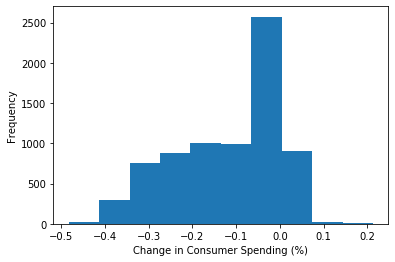

NormaltestResult(statistic=1027.3898651364666, pvalue=8.037581764851873e-224)


<Figure size 432x288 with 0 Axes>

In [29]:
#Normal test
plt.hist(spending)
plt.xlabel('Change in Consumer Spending (%)')
plt.ylabel('Frequency')
plt.show()
print(stats.normaltest(spending.sample(7446)))
plt.savefig('Images/Normality_Test_ConsumerSpending')

In [30]:
cases = merge2_df['case_rate']

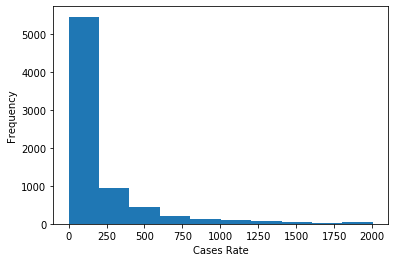

NormaltestResult(statistic=4394.909769006162, pvalue=0.0)


<Figure size 432x288 with 0 Axes>

In [31]:
#Normal test
plt.hist(cases)
plt.xlabel('Cases Rate')
plt.ylabel('Frequency')
plt.show()
print(stats.normaltest(cases.sample(7446)))
plt.savefig('Images/Normality_Test_CaseRate')

## Covid-19 Cases (%) by State as of July 21,2020

In [32]:
cases_df.head()

,abbr,fips,jurisdiction,Total Cases,Total Death,Death_100k,CasesInLast7Days,RatePer100000
0,AK,2,Alaska,1949,18,2.4,410,264.3
1,AL,1,Alabama,68950,1292,26.4,13360,1410.6
2,AR,5,Arkansas,33927,363,12.0,4988,1125.7
3,AS,60,American Samoa,0,0,NaN,0,0.0
4,AZ,4,Arizona,145183,2784,38.8,21359,2024.4


In [33]:
# Number of Cases as of 07/21/2020
cases_df = cases_df.rename(columns={"abbr": "stateabbrev"})
cases_df.head()

,stateabbrev,fips,jurisdiction,Total Cases,Total Death,Death_100k,CasesInLast7Days,RatePer100000
0,AK,2,Alaska,1949,18,2.4,410,264.3
1,AL,1,Alabama,68950,1292,26.4,13360,1410.6
2,AR,5,Arkansas,33927,363,12.0,4988,1125.7
3,AS,60,American Samoa,0,0,NaN,0,0.0
4,AZ,4,Arizona,145183,2784,38.8,21359,2024.4


In [34]:
abr_top5_list=['NY','NJ','MA','RI','DC','FL']
abr_top5_df = cases_df[cases_df['stateabbrev'].isin(abr_top5_list)]
abr_top5_df

,stateabbrev,fips,jurisdiction,Total Cases,Total Death,Death_100k,CasesInLast7Days,RatePer100000
8,DC,11,District of Columbia,11339,579,82.4,433,1614.2
10,FL,12,Florida,355899,5072,23.8,77232,1670.9
21,MA,25,Massachusetts,113789,8433,122.2,1962,1648.6
34,NJ,34,New Jersey,176963,15715,176.4,1441,1986.4
37,NY,36,New York,185623,8792,78.9,2661,1665.8
45,RI,44,Rhode Island,17904,995,94.1,417,1693.3


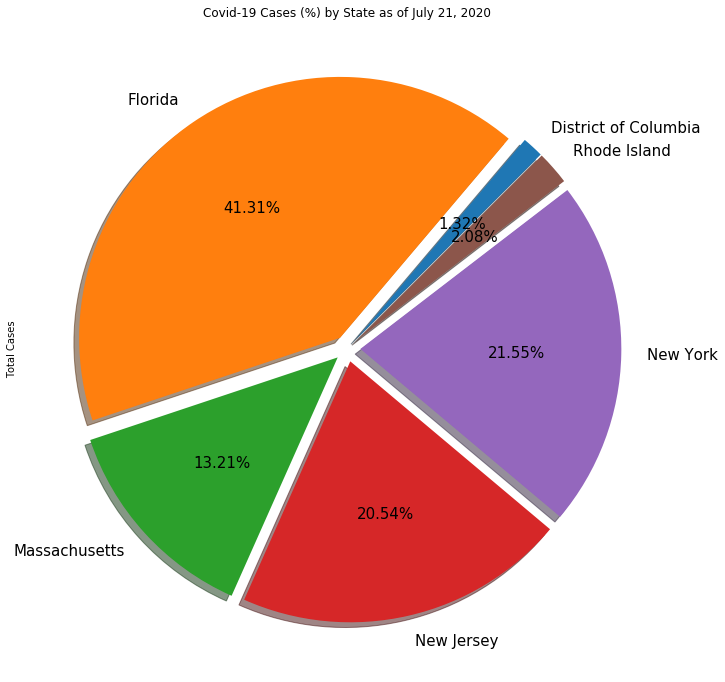

In [35]:
by_state=abr_top5_df.groupby('jurisdiction').mean()
by_state

# Generate a pie plot showing the distribution of Covid-19 Cases (%) by State
pie_plot=by_state.plot.pie(y="Total Cases",title="Covid-19 Cases (%) by State as of July 21, 2020",
autopct='%2.2f%%',figsize=(12,12), shadow=True,legend=False,explode=(0.05,0.05, 0.05, 0.05,0.05,0.05),fontsize=15,startangle = 45)
plt.savefig('Images/Case_Pie')

## Covid-19 Relationship with Consumer Spending Behavior with Daily Data

The correlation for Covid-19 case rate and average Consumer Spending-0.45
The Spearman r correlation for Covid-19 case rate and average Consumer Spending -0.49
The r-squared is: 0.2041240698249281


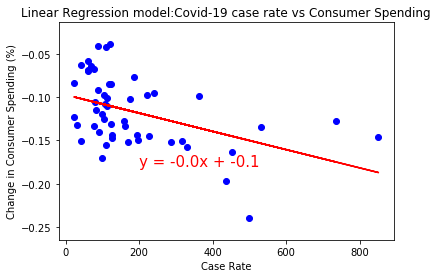

In [36]:
#Linear Regression and Correlation with Daily Data
by_st_abbrev=merge2_df.groupby(["stateabbrev"]).mean()
by_st_abbrev
#Scatter Plot Correlation and Regression
x_values = by_st_abbrev['case_rate']
y_values = by_st_abbrev['spend_all']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="blue")
plt.plot(x_values,regress_values,"r-") 
plt.annotate(line_eq,(200,-0.18),fontsize=15,color="red")
plt.title('Linear Regression model:Covid-19 case rate vs Consumer Spending')
plt.xlabel('Case Rate')
plt.ylabel('Change in Consumer Spending (%)')
correlation = stats.pearsonr( by_st_abbrev['case_rate'],by_st_abbrev['spend_all'])
correlation_s = stats.spearmanr(by_st_abbrev['case_rate'], by_st_abbrev['spend_all'])
print(f"The correlation for Covid-19 case rate and average Consumer Spending{round(correlation[0],2)}")
print(f"The Spearman r correlation for Covid-19 case rate and average Consumer Spending {round(correlation_s[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Images/Linear_Regression_case rate_vs_Consumer Spending')

In [37]:
correlation = stats.spearmanr(by_st_abbrev['case_rate'],by_st_abbrev['spend_all'])
correlation

SpearmanrResult(correlation=-0.4853393665158371, pvalue=0.0003063764624047733)

# Consumer Spending and Case Rate for the top 5 States with Covid 19 Cases and Florida
## New York, New Jersey, Massachusetts, Rhode Island, District Of Columbia, Florida

In [38]:
eom_reduced = eom_df.loc[:,["case_rate", "statename", "month","spend_all"]]
eom_reduced=pd.DataFrame(eom_reduced )
eom_reduced.head()

,case_rate,statename,month,spend_all
365,0.0,District Of Columbia,1,-0.01250
366,0.0,Florida,1,0.00720
378,0.0,Massachusetts,1,-0.03080
387,0.0,New Jersey,1,-0.01810
389,0.0,New York,1,-0.00905


In [39]:
by_month=eom_reduced.groupby('month').mean()
by_month_df=pd.DataFrame(by_month)
by_month_df

,case_rate,spend_all
month,,
1,0.000000,-0.019508
2,0.002417,-0.029467
3,140.933333,-0.365667
4,902.500000,-0.251667
5,1343.500000,-0.167200
6,1457.000000,-0.116200


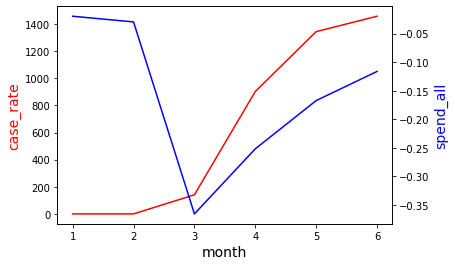

<Figure size 720x720 with 0 Axes>

In [40]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(by_month_df['case_rate'], color="red")
# set x-axis label
plt.figure(figsize=(10,10))
ax.set_xlabel("month",fontsize=14)
# set y-axis label
ax.set_ylabel("case_rate",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(by_month_df['spend_all'],color="blue")
ax2.set_ylabel("spend_all",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('Images/two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Calculate central tendency measures for Change in Consumer Spending % by State

In [41]:
#Calculate central tendency measures for Change in Consumer Spending % by State
top5_df.groupby("statename").agg(['mean','median','var','std','sem','min','max'])["spend_all"]


,mean,median,var,std,sem,min,max
statename,,,,,,,
District Of Columbia,-0.196942,-0.26650,0.022849,0.151158,0.012510,-0.398,0.0505
Florida,-0.097488,-0.07905,0.007665,0.087550,0.007246,-0.305,0.0072
Massachusetts,-0.135034,-0.12450,0.015233,0.123422,0.010214,-0.402,0.0444
New Jersey,-0.128106,-0.12100,0.013503,0.116200,0.009617,-0.372,0.0209
New York,-0.145591,-0.14700,0.013735,0.117196,0.009699,-0.376,0.0118
Rhode Island,-0.239449,-0.27300,0.022714,0.150711,0.012473,-0.483,0.0198


In [42]:
reduced_top5_df = top5_df.loc[:,["date", "year", "month", "day", "statefips", "statename","stateabbrev", "case_rate","spend_acf",
                                   "spend_aer","spend_apg","spend_grf","spend_hcs","spend_tws"]]
reduced_top5_df.head()

,date,year,month,day,statefips,statename,stateabbrev,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
8,2020-01-24,2020,1,24,11,District Of Columbia,DC,0.0,-0.00066,0.00528,-0.04930,-0.00575,0.1290,0.01150
9,2020-01-24,2020,1,24,12,Florida,FL,0.0,-0.01970,-0.04380,-0.00964,-0.01100,-0.0186,-0.00569
21,2020-01-24,2020,1,24,25,Massachusetts,MA,0.0,0.02580,-0.04450,0.03550,-0.03080,0.0485,-0.03790
30,2020-01-24,2020,1,24,34,New Jersey,NJ,0.0,-0.00736,0.01600,-0.00722,-0.02020,-0.0451,0.00592
32,2020-01-24,2020,1,24,36,New York,NY,0.0,0.00214,-0.03430,0.01430,-0.02250,-0.0316,0.06060


In [43]:
# Set the 'stateabbrev' to be our index for easy referencing of rows
top5 = reduced_top5_df.set_index("stateabbrev")
top5.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
DC,2020-01-24,2020,1,24,11,District Of Columbia,0.0,-0.00066,0.00528,-0.04930,-0.00575,0.1290,0.01150
FL,2020-01-24,2020,1,24,12,Florida,0.0,-0.01970,-0.04380,-0.00964,-0.01100,-0.0186,-0.00569
MA,2020-01-24,2020,1,24,25,Massachusetts,0.0,0.02580,-0.04450,0.03550,-0.03080,0.0485,-0.03790
NJ,2020-01-24,2020,1,24,34,New Jersey,0.0,-0.00736,0.01600,-0.00722,-0.02020,-0.0451,0.00592
NY,2020-01-24,2020,1,24,36,New York,0.0,0.00214,-0.03430,0.01430,-0.02250,-0.0316,0.06060


In [44]:
top5_df_daterange = top5_df[(top5_df['date'] >= '2020-01-24') & (top5_df['date'] <= '2020-06-17')]
top5_df_daterange.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
8,2020-01-24,2020,1,24,11,0.0,.,-0.00066,0.00528,-0.00252,0.00384,-0.0491,-0.00417,-0.04930,-0.00575,0.1290,0.01150,District Of Columbia,DC,705749
9,2020-01-24,2020,1,24,12,0.0,.,-0.01970,-0.04380,-0.01450,-0.0133,-0.0249,-0.01070,-0.00964,-0.01100,-0.0186,-0.00569,Florida,FL,21477737
21,2020-01-24,2020,1,24,25,0.0,.,0.02580,-0.04450,-0.00358,-0.00764,-0.0126,0.00507,0.03550,-0.03080,0.0485,-0.03790,Massachusetts,MA,6892503
30,2020-01-24,2020,1,24,34,0.0,.,-0.00736,0.01600,-0.00548,-0.00759,0.00563,-0.00414,-0.00722,-0.02020,-0.0451,0.00592,New Jersey,NJ,8882190
32,2020-01-24,2020,1,24,36,0.0,.,0.00214,-0.03430,-0.00610,-0.00332,0.00127,-0.01040,0.01430,-0.02250,-0.0316,0.06060,New York,NY,19453561


In [45]:
reduced_top5_date = top5_df_daterange[["date","spend_acf","spend_aer","spend_apg","spend_grf","spend_hcs","spend_tws"]]
reduced_top5_date.head()

,date,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
8,2020-01-24,-0.00066,0.00528,-0.04930,-0.00575,0.1290,0.01150
9,2020-01-24,-0.01970,-0.04380,-0.00964,-0.01100,-0.0186,-0.00569
21,2020-01-24,0.02580,-0.04450,0.03550,-0.03080,0.0485,-0.03790
30,2020-01-24,-0.00736,0.01600,-0.00722,-0.02020,-0.0451,0.00592
32,2020-01-24,0.00214,-0.03430,0.01430,-0.02250,-0.0316,0.06060


In [46]:
by_date_5_df = reduced_top5_date.set_index("date")
by_date_5_df.head()

,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
date,,,,,,
2020-01-24,-0.00066,0.00528,-0.04930,-0.00575,0.1290,0.01150
2020-01-24,-0.01970,-0.04380,-0.00964,-0.01100,-0.0186,-0.00569
2020-01-24,0.02580,-0.04450,0.03550,-0.03080,0.0485,-0.03790
2020-01-24,-0.00736,0.01600,-0.00722,-0.02020,-0.0451,0.00592
2020-01-24,0.00214,-0.03430,0.01430,-0.02250,-0.0316,0.06060


In [47]:
dates = reduced_top5_date['date'].unique()

In [48]:
eom_df =top5_df[top5_df['date'].isin(['2020-01-31', '2020-02-28', '2020-03-31','2020-04-30','2020-05-31','2020-06-17'])]
eom_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
365,2020-01-31,2020,1,31,11,0.0,0,-0.0608,0.011300,-0.01250,-0.0225,-0.0227,0.04720,-0.01470,-0.00464,0.01430,0.0490,District Of Columbia,DC,705749
366,2020-01-31,2020,1,31,12,0.0,0,0.0140,0.032300,0.00720,-0.0024,0.0217,0.00407,0.02200,0.01750,-0.01230,-0.0305,Florida,FL,21477737
378,2020-01-31,2020,1,31,25,0.0,0,-0.0325,-0.001670,-0.03080,-0.0304,0.092,-0.04090,-0.02830,-0.01440,-0.05370,-0.0499,Massachusetts,MA,6892503
387,2020-01-31,2020,1,31,34,0.0,0,-0.0157,-0.030100,-0.01810,-0.0144,-0.0276,-0.02280,-0.01350,-0.01490,-0.02610,-0.0264,New Jersey,NJ,8882190
389,2020-01-31,2020,1,31,36,0.0,0,-0.0174,-0.000033,-0.00905,-0.0114,-0.00278,-0.00765,-0.00141,-0.01020,-0.00843,-0.0343,New York,NY,19453561


In [49]:
eom_df
by_month2=eom_df.groupby('month').mean()
by_month_df2=pd.DataFrame(by_month2)
by_month_df2

,year,day,statefips,case_rate,spend_acf,spend_aer,spend_all,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,state_pop2019
month,,,,,,,,,,,,,
1,2020.0,31.0,27.0,0.000000,-0.039067,-0.018534,-0.019508,-0.004953,-0.004168,-0.00689,-0.041705,0.013150,9745183.5
2,2020.0,28.0,27.0,0.002417,-0.068167,-0.108183,-0.029467,-0.039578,-0.024033,0.03176,-0.014617,-0.105617,9745183.5
3,2020.0,31.0,27.0,140.933333,-0.704000,-0.742500,-0.365667,-0.342833,-0.523667,0.10160,-0.645167,-0.725000,9745183.5
4,2020.0,30.0,27.0,902.500000,-0.628833,-0.785833,-0.251667,-0.225333,-0.345000,0.19870,-0.589500,-0.727500,9745183.5
5,2020.0,31.0,27.0,1343.500000,-0.504333,-0.614500,-0.167200,-0.157133,-0.203000,0.11565,-0.343000,-0.624000,9745183.5
6,2020.0,17.0,27.0,1457.000000,-0.436833,-0.483167,-0.116200,-0.095283,-0.098667,0.10860,-0.185067,-0.549500,9745183.5


In [50]:
# Regression by Industry

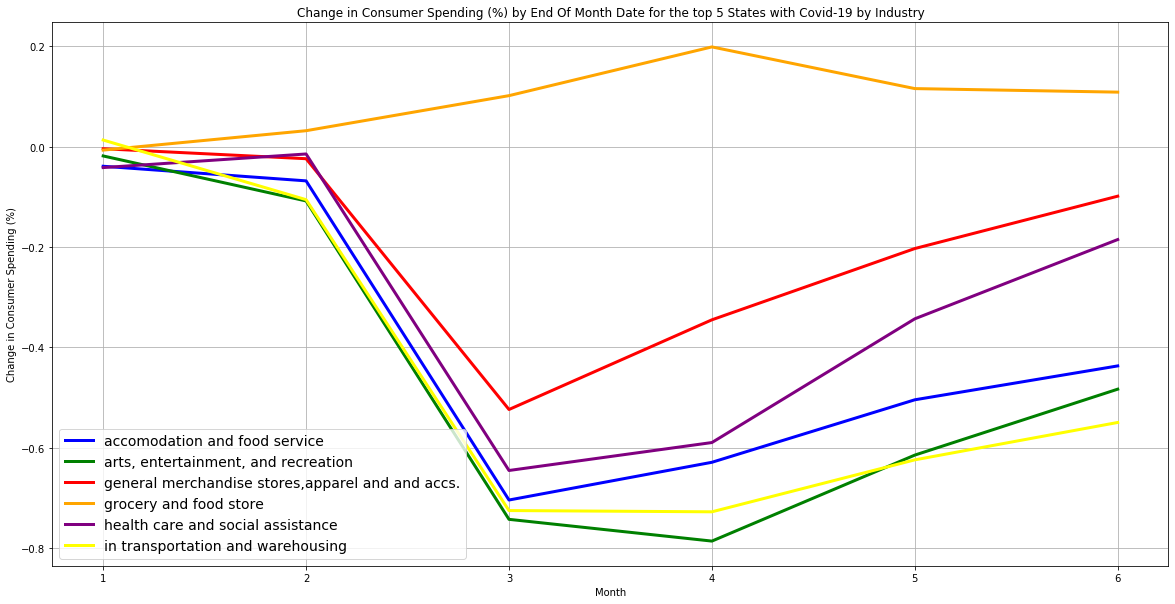

In [51]:
plt.figure(figsize=(20,10))


acf,= plt.plot(by_month_df2['spend_acf'],color="blue", label='accomodation and food service', linewidth=3.0)
aer,= plt.plot(by_month_df2['spend_aer'],color="green", label="arts, entertainment, and recreation ", linewidth=3.0)
apg,= plt.plot(by_month_df2['spend_apg'],color="red", label="general merchandise stores,apparel and and accs.", linewidth=3.0)
grf,= plt.plot(by_month_df2['spend_grf'],color="orange", label="grocery and food store", linewidth=3.0)
hcs,= plt.plot(by_month_df2['spend_hcs'],color="purple", label="health care and social assistance", linewidth=3.0 )
tws,= plt.plot(by_month_df2['spend_tws'],color="yellow", label="in transportation and warehousing", linewidth=3.0 )
# Create a legend for our chart
plt.legend(handles=[acf,aer,apg,grf,hcs,tws], loc="lower left",fontsize=14)
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Change in Consumer Spending (%)')
#plt.xticks(np.arange(min(by_month_df2["month"]), max(by_month_df2["month"])+1, 1.0))
# Set a title of the current axes.
plt.title('Change in Consumer Spending (%) by End Of Month Date for the top 5 States with Covid-19 by Industry')
plt.savefig('Images/Change in Consumer Spending by Industry')
plt.grid()
# Show the chart
plt.show()
#spend_aer,

In [52]:
eom_df = top5[top5['date'].isin(['2020-01-31', '2020-02-28', '2020-03-31','2020-04-30','2020-05-31','2020-06-17'])]
eom_df.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
DC,2020-01-31,2020,1,31,11,District Of Columbia,0.0,-0.0608,0.011300,-0.01470,-0.00464,0.01430,0.0490
FL,2020-01-31,2020,1,31,12,Florida,0.0,0.0140,0.032300,0.02200,0.01750,-0.01230,-0.0305
MA,2020-01-31,2020,1,31,25,Massachusetts,0.0,-0.0325,-0.001670,-0.02830,-0.01440,-0.05370,-0.0499
NJ,2020-01-31,2020,1,31,34,New Jersey,0.0,-0.0157,-0.030100,-0.01350,-0.01490,-0.02610,-0.0264
NY,2020-01-31,2020,1,31,36,New York,0.0,-0.0174,-0.000033,-0.00141,-0.01020,-0.00843,-0.0343


In [53]:
by_date_range = top5[(top5['date'] >= '2020-01-24') & (top5['date'] <= '2020-06-17')]
by_date_range.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
DC,2020-01-24,2020,1,24,11,District Of Columbia,0.0,-0.00066,0.00528,-0.04930,-0.00575,0.1290,0.01150
FL,2020-01-24,2020,1,24,12,Florida,0.0,-0.01970,-0.04380,-0.00964,-0.01100,-0.0186,-0.00569
MA,2020-01-24,2020,1,24,25,Massachusetts,0.0,0.02580,-0.04450,0.03550,-0.03080,0.0485,-0.03790
NJ,2020-01-24,2020,1,24,34,New Jersey,0.0,-0.00736,0.01600,-0.00722,-0.02020,-0.0451,0.00592
NY,2020-01-24,2020,1,24,36,New York,0.0,0.00214,-0.03430,0.01430,-0.02250,-0.0316,0.06060


In [54]:
by_industry_plot_df = by_date_range[["date","month", "case_rate","spend_acf","spend_aer","spend_apg","spend_grf","spend_hcs","spend_tws"]]
by_industry_plot_df.head()

,date,month,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,
DC,2020-01-24,1,0.0,-0.00066,0.00528,-0.04930,-0.00575,0.1290,0.01150
FL,2020-01-24,1,0.0,-0.01970,-0.04380,-0.00964,-0.01100,-0.0186,-0.00569
MA,2020-01-24,1,0.0,0.02580,-0.04450,0.03550,-0.03080,0.0485,-0.03790
NJ,2020-01-24,1,0.0,-0.00736,0.01600,-0.00722,-0.02020,-0.0451,0.00592
NY,2020-01-24,1,0.0,0.00214,-0.03430,0.01430,-0.02250,-0.0316,0.06060


In [55]:
by_industry_plot_df = by_industry_plot_df.set_index("date")
by_industry_plot_df.head()

,month,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
date,,,,,,,,
2020-01-24,1,0.0,-0.00066,0.00528,-0.04930,-0.00575,0.1290,0.01150
2020-01-24,1,0.0,-0.01970,-0.04380,-0.00964,-0.01100,-0.0186,-0.00569
2020-01-24,1,0.0,0.02580,-0.04450,0.03550,-0.03080,0.0485,-0.03790
2020-01-24,1,0.0,-0.00736,0.01600,-0.00722,-0.02020,-0.0451,0.00592
2020-01-24,1,0.0,0.00214,-0.03430,0.01430,-0.02250,-0.0316,0.06060


In [56]:
# Create a list of the dates to use for the x axis
dates =by_date_range['date'].unique()

In [57]:
NY = eom_df.loc[eom_df.index == "NY", :]
NY.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
NY,2020-01-31,2020,1,31,36,New York,0.0,-0.0174,-0.000033,-0.00141,-0.01020,-0.00843,-0.0343
NY,2020-02-28,2020,2,28,36,New York,0.0,-0.0806,-0.090800,-0.01770,0.00921,-0.04750,-0.0873
NY,2020-03-31,2020,3,31,36,New York,392.0,-0.6980,-0.772000,-0.56200,0.07700,-0.65100,-0.7250
NY,2020-04-30,2020,4,30,36,New York,1592.0,-0.6150,-0.801000,-0.36200,0.20600,-0.58600,-0.7170
NY,2020-05-31,2020,5,31,36,New York,1931.0,-0.4940,-0.629000,-0.27700,0.15300,-0.47500,-0.5960


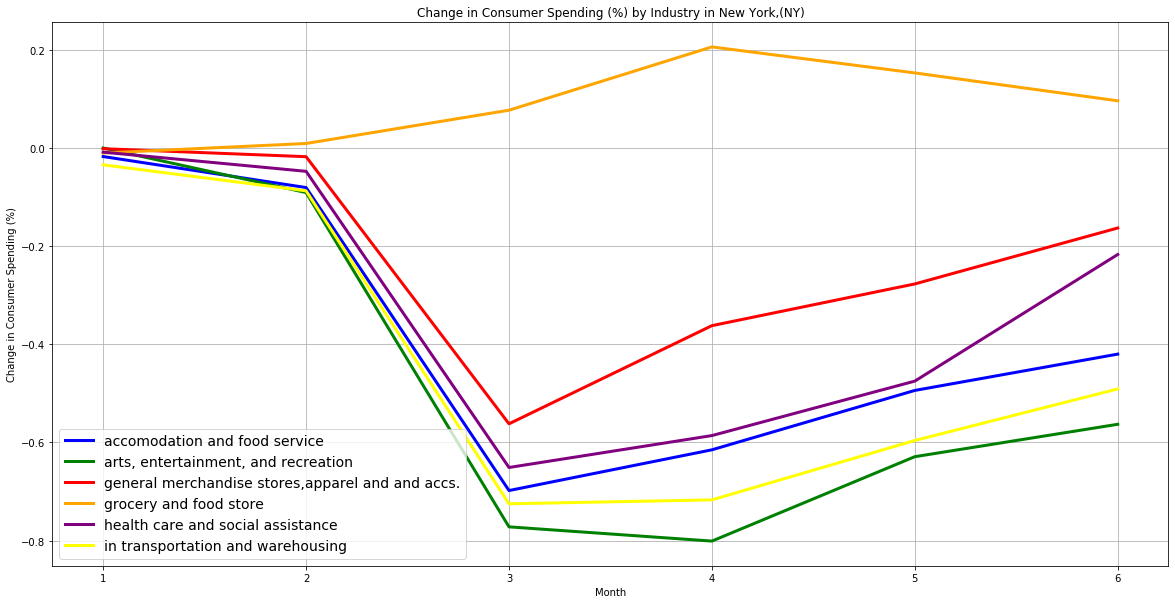

In [58]:
plt.figure(figsize=(20,10))
spend_acf, = plt.plot(NY["month"],NY["spend_acf"], color="blue", label="accomodation and food service",linewidth=3.0 )
spend_aer, = plt.plot(NY["month"],NY["spend_aer"], color="green", label="arts, entertainment, and recreation ",linewidth=3.0 )
spend_apg, = plt.plot(NY["month"],NY["spend_apg"], color="red", label="general merchandise stores,apparel and and accs.",linewidth=3.0)
spend_grf, = plt.plot(NY["month"],NY["spend_grf"], color="orange", label="grocery and food store",linewidth=3.0 )
spend_hcs, = plt.plot(NY["month"],NY["spend_hcs"], color="purple", label="health care and social assistance",linewidth=3.0 )
spend_tws, = plt.plot(NY["month"],NY["spend_tws"], color="yellow", label="in transportation and warehousing",linewidth=3.0 )
# Create a legend for our chart
plt.legend(handles=[spend_acf, spend_aer, spend_apg,spend_grf,spend_hcs,spend_tws], loc="lower left",fontsize=14)
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Change in Consumer Spending (%)')
# Set a title of the current axes.
plt.xticks(np.arange(min(eom_df["month"]), max(eom_df["month"])+1, 1.0))
plt.title('Change in Consumer Spending (%) by Industry in New York,(NY)')
plt.savefig('Images/Change in Consumer Spending by Industry in NY')

plt.grid()

# Show the chart
plt.show()

In [59]:
NJ = eom_df.loc[eom_df.index == "NJ", :]
NJ.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
NJ,2020-01-31,2020,1,31,34,New Jersey,0.0,-0.0157,-0.0301,-0.0135,-0.0149,-0.0261,-0.0264
NJ,2020-02-28,2020,2,28,34,New Jersey,0.0,-0.0412,-0.0633,-0.0303,0.0207,0.0208,-0.0847
NJ,2020-03-31,2020,3,31,34,New Jersey,210.0,-0.6830,-0.6590,-0.5580,0.0866,-0.5970,-0.7030
NJ,2020-04-30,2020,4,30,34,New Jersey,1336.0,-0.6150,-0.6380,-0.3650,0.2680,-0.5330,-0.7120
NJ,2020-05-31,2020,5,31,34,New Jersey,1806.0,-0.4630,-0.4290,-0.2430,0.1860,-0.3060,-0.6060


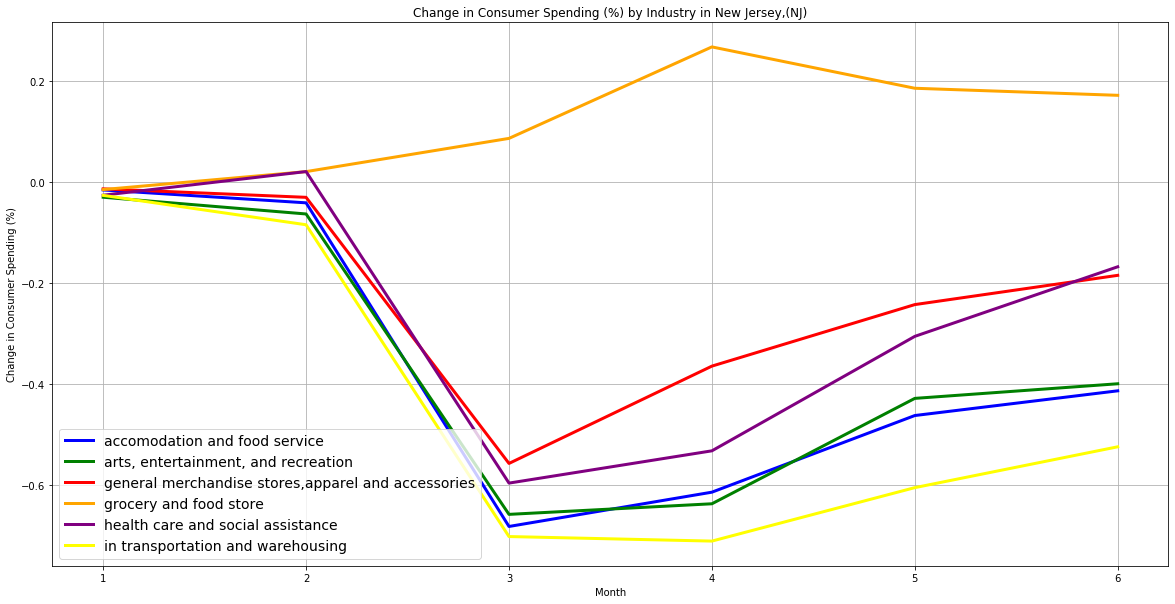

In [60]:
plt.figure(figsize=(20,10))
spend_acf, = plt.plot(NJ["month"],NJ["spend_acf"], color="blue", label="accomodation and food service",linewidth=3.0 )
spend_aer, = plt.plot(NJ["month"],NJ["spend_aer"], color="green", label="arts, entertainment, and recreation ",linewidth=3.0 )
spend_apg, = plt.plot(NJ["month"],NJ["spend_apg"], color="red", label="general merchandise stores,apparel and accessories",linewidth=3.0)
spend_grf, = plt.plot(NJ["month"],NJ["spend_grf"], color="orange", label="grocery and food store",linewidth=3.0 )
spend_hcs, = plt.plot(NJ["month"],NJ["spend_hcs"], color="purple", label="health care and social assistance",linewidth=3.0 )
spend_tws, = plt.plot(NJ["month"],NJ["spend_tws"], color="yellow", label="in transportation and warehousing",linewidth=3.0 )
# Create a legend for our chart
plt.legend(handles=[spend_acf, spend_aer, spend_apg,spend_grf,spend_hcs,spend_tws], loc="lower left",fontsize=14)
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Change in Consumer Spending (%)')
plt.xticks(np.arange(min(eom_df["month"]), max(eom_df["month"])+1, 1.0))
# Set a title of the current axes.
plt.title('Change in Consumer Spending (%) by Industry in New Jersey,(NJ)')
plt.savefig('Images/Change in Consumer Spending by Industry in NJ')
plt.grid()

# Show the chart
plt.show()

In [61]:
# Filter the data so that only those sightings in the MA are in a DataFrame
MA = eom_df.loc[eom_df.index == "MA", :]
MA.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
MA,2020-01-31,2020,1,31,25,Massachusetts,0.0000,-0.0325,-0.00167,-0.0283,-0.0144,-0.0537,-0.0499
MA,2020-02-28,2020,2,28,25,Massachusetts,0.0145,-0.0757,-0.12300,0.0329,0.0546,0.0802,-0.0750
MA,2020-03-31,2020,3,31,25,Massachusetts,96.0000,-0.6980,-0.79900,-0.5440,0.0679,-0.6560,-0.7590
MA,2020-04-30,2020,4,30,25,Massachusetts,903.0000,-0.5840,-0.77200,-0.2930,0.2400,-0.5700,-0.7030
MA,2020-05-31,2020,5,31,25,Massachusetts,1407.0000,-0.4860,-0.55900,-0.1650,0.1920,-0.4350,-0.6030


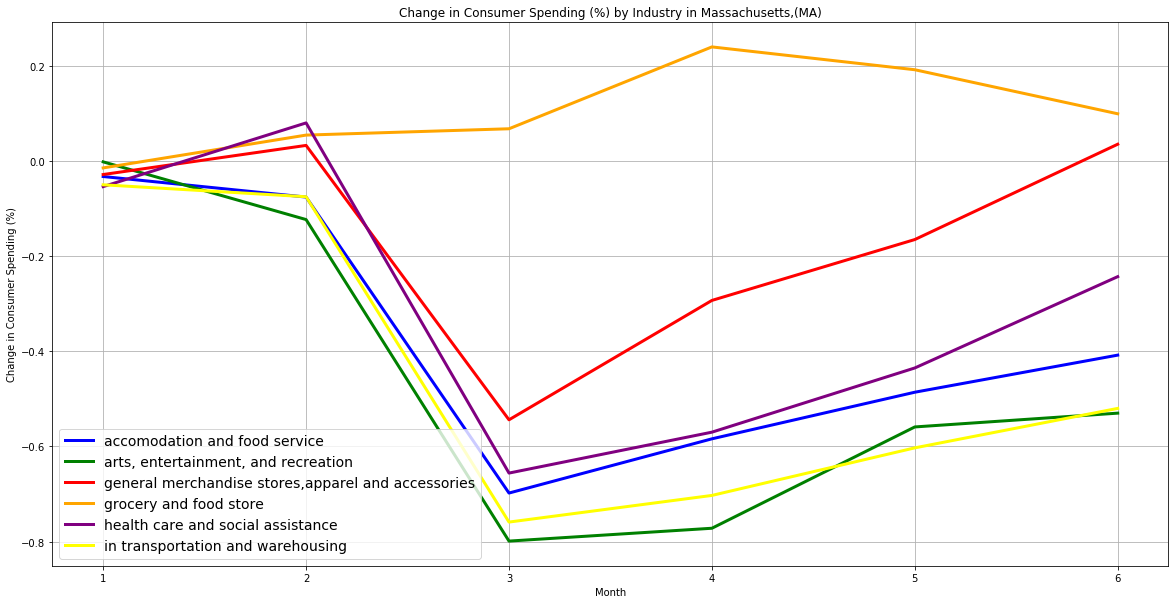

In [62]:
plt.figure(figsize=(20,10))
spend_acf, = plt.plot(MA["month"],MA["spend_acf"], color="blue", label="accomodation and food service",linewidth=3.0 )
spend_aer, = plt.plot(MA["month"],MA["spend_aer"], color="green", label="arts, entertainment, and recreation ",linewidth=3.0 )
spend_apg, = plt.plot(MA["month"],MA["spend_apg"], color="red", label="general merchandise stores,apparel and accessories",linewidth=3.0 )
spend_grf, = plt.plot(MA["month"],MA["spend_grf"], color="orange", label="grocery and food store",linewidth=3.0 )
spend_hcs, = plt.plot(MA["month"],MA["spend_hcs"], color="purple", label="health care and social assistance",linewidth=3.0 )
spend_tws, = plt.plot(MA["month"],MA["spend_tws"], color="yellow", label="in transportation and warehousing",linewidth=3.0 )
# Create a legend for our chart
plt.legend(handles=[spend_acf, spend_aer, spend_apg,spend_grf,spend_hcs,spend_tws], loc="lower left",fontsize=14)
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Change in Consumer Spending (%)')
# Set a title of the current axes.
plt.xticks(np.arange(min(eom_df["month"]), max(eom_df["month"])+1, 1.0))
plt.title('Change in Consumer Spending (%) by Industry in Massachusetts,(MA)')
plt.savefig('Images/Change in Consumer Spending by Industry in MA')
plt.grid()

# Show the chart
plt.show()

In [63]:
# Filter the data so that only those sightings in the RI are in a DataFrame
RI= eom_df.loc[eom_df.index == "RI", :]
RI.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
RI,2020-01-31,2020,1,31,44,Rhode Island,0.0,-0.122,-0.123,0.0109,-0.0147,-0.1640,0.1710
RI,2020-02-28,2020,2,28,44,Rhode Island,0.0,-0.128,-0.214,-0.0924,0.0118,0.0284,-0.0397
RI,2020-03-31,2020,3,31,44,Rhode Island,46.1,-0.765,-0.776,-0.5540,0.0132,-0.8440,-0.6690
RI,2020-04-30,2020,4,30,44,Rhode Island,814.0,-0.706,-0.990,-0.3790,0.0212,-0.8490,-0.7430
RI,2020-05-31,2020,5,31,44,Rhode Island,1409.0,-0.621,-0.867,-0.1910,-0.0821,-0.4530,-0.6420


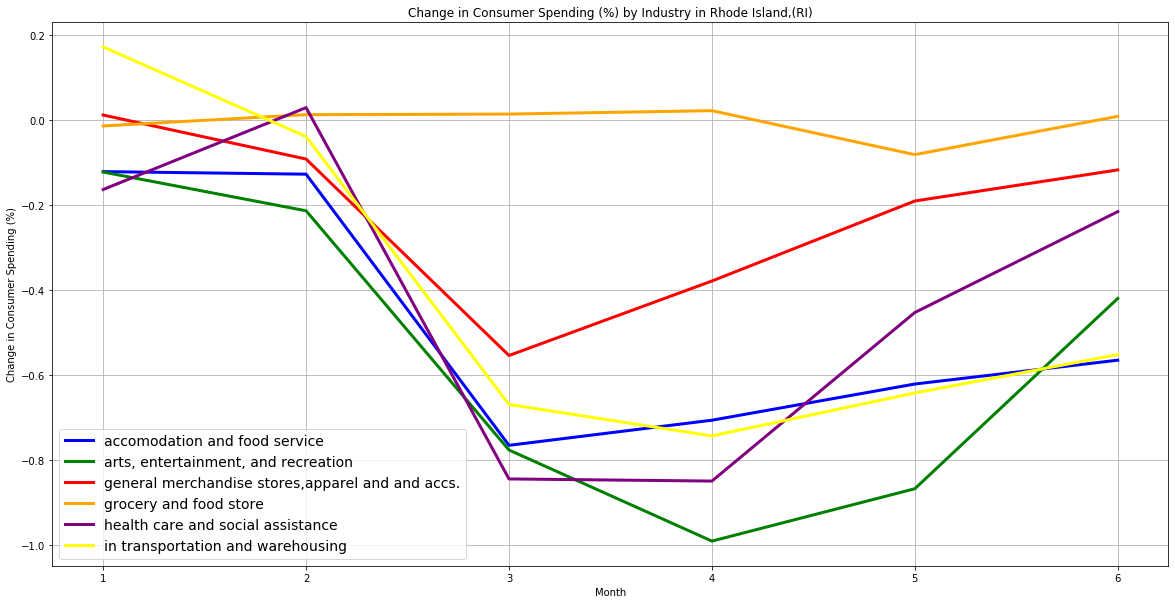

In [64]:
plt.figure(figsize=(20,10))
spend_acf, = plt.plot(RI["month"],RI["spend_acf"], color="blue", label="accomodation and food service",linewidth=3.0 )
spend_aer, = plt.plot(RI["month"],RI["spend_aer"], color="green", label="arts, entertainment, and recreation ",linewidth=3.0 )
spend_apg, = plt.plot(RI["month"],RI["spend_apg"], color="red", label="general merchandise stores,apparel and and accs.",linewidth=3.0)
spend_grf, = plt.plot(RI["month"],RI["spend_grf"], color="orange", label="grocery and food store",linewidth=3.0 )
spend_hcs, = plt.plot(RI["month"],RI["spend_hcs"], color="purple", label="health care and social assistance",linewidth=3.0 )
spend_tws, = plt.plot(RI["month"],RI["spend_tws"], color="yellow", label="in transportation and warehousing",linewidth=3.0 )
# Create a legend for our chart
plt.legend(handles=[spend_acf, spend_aer, spend_apg,spend_grf,spend_hcs,spend_tws], loc="lower left",fontsize=14)
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Change in Consumer Spending (%)')
# Set a title of the current axes.
plt.xticks(np.arange(min(eom_df["month"]), max(eom_df["month"])+1, 1.0))
plt.title('Change in Consumer Spending (%) by Industry in Rhode Island,(RI)')
plt.savefig('Images/Change in Consumer Spending by Industry in RI')
plt.grid()

# Show the chart
plt.show()

In [65]:
# Filter the data so that only those sightings in the DC are in a DataFrame
DC = eom_df.loc[eom_df.index == "DC", :]
DC.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
DC,2020-01-31,2020,1,31,11,District Of Columbia,0.0,-0.0608,0.0113,-0.0147,-0.00464,0.0143,0.049
DC,2020-02-28,2020,2,28,11,District Of Columbia,0.0,-0.0445,-0.0530,-0.0168,0.09650,-0.1400,-0.210
DC,2020-03-31,2020,3,31,11,District Of Columbia,70.1,-0.7580,-0.7270,-0.4420,0.28800,-0.5530,-0.834
DC,2020-04-30,2020,4,30,11,District Of Columbia,613.0,-0.7380,-0.8130,-0.3460,0.25400,-0.5240,-0.843
DC,2020-05-31,2020,5,31,11,District Of Columbia,1247.0,-0.6660,-0.7020,-0.2860,0.18900,-0.2830,-0.768


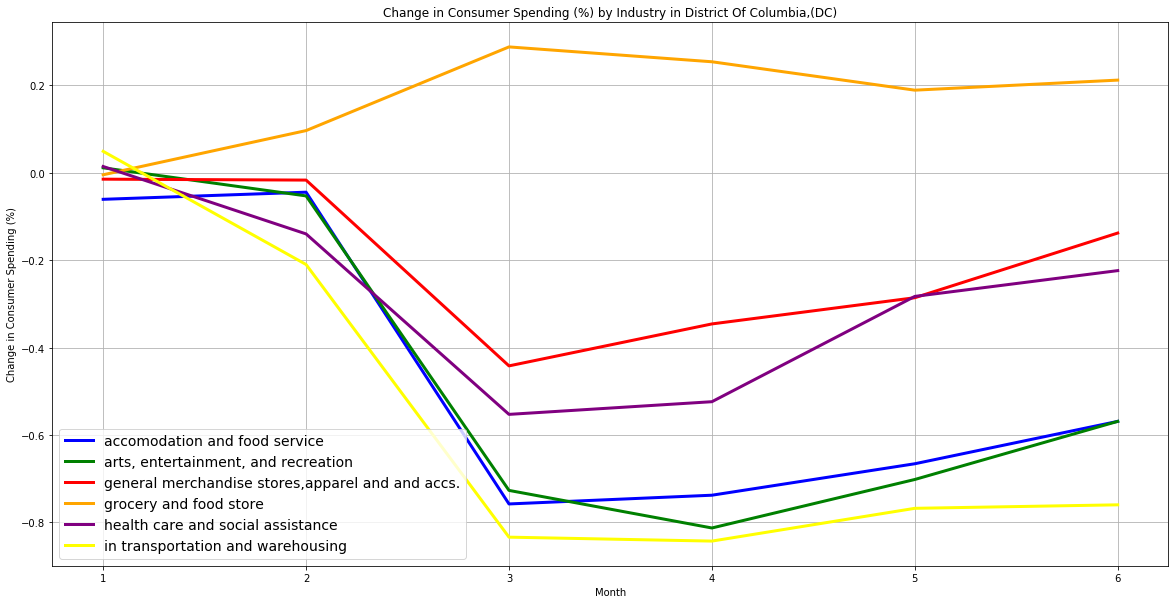

In [66]:
plt.figure(figsize=(20,10))
spend_acf, = plt.plot(DC["month"],DC["spend_acf"], color="blue", label="accomodation and food service",linewidth=3.0  )
spend_aer, = plt.plot(DC["month"],DC["spend_aer"], color="green", label="arts, entertainment, and recreation ",linewidth=3.0  )
spend_apg, = plt.plot(DC["month"],DC["spend_apg"], color="red", label="general merchandise stores,apparel and and accs.",linewidth=3.0 )
spend_grf, = plt.plot(DC["month"],DC["spend_grf"], color="orange", label="grocery and food store",linewidth=3.0  )
spend_hcs, = plt.plot(DC["month"],DC["spend_hcs"], color="purple", label="health care and social assistance",linewidth=3.0  )
spend_tws, = plt.plot(DC["month"],DC["spend_tws"], color="yellow", label="in transportation and warehousing",linewidth=3.0  )
# Create a legend for our chart
plt.legend(handles=[spend_acf, spend_aer, spend_apg,spend_grf,spend_hcs,spend_tws], loc="lower left",fontsize=14)
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Change in Consumer Spending (%)')
# Set a title of the current axes.
plt.xticks(np.arange(min(eom_df["month"]), max(eom_df["month"])+1, 1.0))
plt.title('Change in Consumer Spending (%) by Industry in District Of Columbia,(DC)')
plt.savefig('Images/Change in Consumer Spending by Industry in DC')
plt.grid()
# Show the chart
plt.show()

In [67]:
FL = eom_df.loc[eom_df.index == "FL", :]
FL.head()

,date,year,month,day,statefips,statename,case_rate,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
stateabbrev,,,,,,,,,,,,,
FL,2020-01-31,2020,1,31,12,Florida,0.0,0.014,0.0323,0.0220,0.01750,-0.0123,-0.0305
FL,2020-02-28,2020,2,28,12,Florida,0.0,-0.039,-0.1050,-0.0199,-0.00225,-0.0296,-0.1370
FL,2020-03-31,2020,3,31,12,Florida,31.4,-0.622,-0.7220,-0.4820,0.07690,-0.5700,-0.6600
FL,2020-04-30,2020,4,30,12,Florida,157.0,-0.515,-0.7010,-0.3250,0.20300,-0.4750,-0.6470
FL,2020-05-31,2020,5,31,12,Florida,261.0,-0.296,-0.5010,-0.0560,0.05600,-0.1060,-0.5290


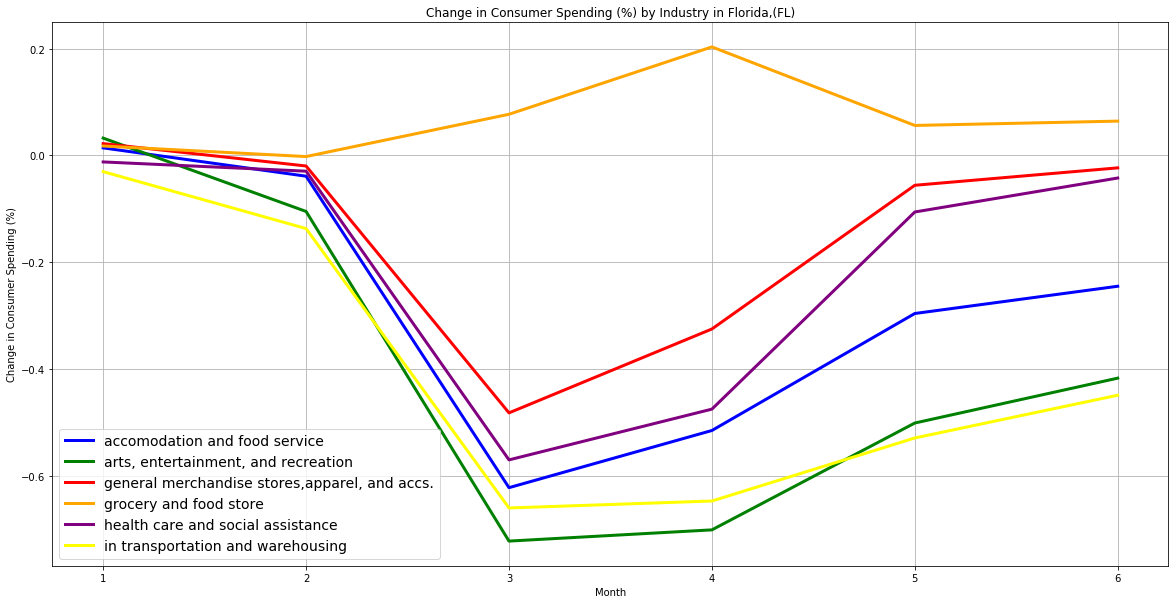

In [68]:
plt.figure(figsize=(20,10))
spend_acf, = plt.plot(FL["month"],FL["spend_acf"], color="blue", label="accomodation and food service",linewidth=3.0)
spend_aer, = plt.plot(FL["month"],FL["spend_aer"], color="green", label="arts, entertainment, and recreation ",linewidth=3.0  )
spend_apg, = plt.plot(FL["month"],FL["spend_apg"], color="red", label="general merchandise stores,apparel, and accs.",linewidth=3.0 )
spend_grf, = plt.plot(FL["month"],FL["spend_grf"], color="orange", label="grocery and food store",linewidth=3.0  )
spend_hcs, = plt.plot(FL["month"],FL["spend_hcs"], color="purple", label="health care and social assistance",linewidth=3.0  )
spend_tws, = plt.plot(FL["month"],FL["spend_tws"], color="yellow", label="in transportation and warehousing",linewidth=3.0  )
# Create a legend for our chart
plt.legend(handles=[spend_acf, spend_aer, spend_apg,spend_grf,spend_hcs,spend_tws], loc="lower left",fontsize=14)
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Change in Consumer Spending (%)')
# Set a title of the current axes.
plt.xticks(np.arange(min(eom_df["month"]), max(eom_df["month"])+1, 1.0))
plt.title('Change in Consumer Spending (%) by Industry in Florida,(FL)')
plt.savefig('Images/Change in Consumer Spending by Industry in FL')
plt.grid()
# Show the chart
plt.savefig('Change in Consumer Spending by Industry in FL')

plt.show()

## Q2: What is the relationship between unemployment insurance claims and consumer spending trends since the onset of COVID-19 in the United States?

### Data Cleaning

In [69]:
# Part 1: Consumer spending (cs) data
# Check the day of week and select data from Saturday only, the end date for each week used in the unemployment insurance data set

q2_cs_df = merge2_df.copy()
q2_cs_df['day_of_week'] = merge2_df['date'].dt.day_name()
q2_cs_df = q2_cs_df.loc[q2_cs_df['day_of_week'] == 'Saturday']
q2_cs_df

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,...,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019,day_of_week
51,2020-01-25,2020,1,25,1,0.00000,.,0.000291,0.0135,0.00580,...,0.00199,0.00612,-0.021100,0.03850,0.0455,-0.02470,Alabama,AL,4903185,Saturday
52,2020-01-25,2020,1,25,2,0.00000,.,-0.064800,0.0268,-0.04460,...,.,-0.05860,0.150000,-0.03790,-0.0852,-0.17400,Alaska,AK,731545,Saturday
53,2020-01-25,2020,1,25,4,0.00000,.,-0.006380,0.0495,-0.01040,...,-0.0101,-0.01140,-0.000813,0.00105,0.0139,-0.02580,Arizona,AZ,7278717,Saturday
54,2020-01-25,2020,1,25,5,0.00000,.,0.030300,-0.0178,0.00584,...,0.0104,0.00174,0.023500,-0.00520,0.0115,0.02110,Arkansas,AR,3017804,Saturday
55,2020-01-25,2020,1,25,6,0.00253,.,-0.003080,-0.0127,0.00565,...,0.00762,0.00773,-0.004620,0.01360,0.0165,-0.00769,California,CA,39512223,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7237,2020-06-13,2020,6,13,51,631.00000,7.48,-0.362000,-0.4060,-0.07740,...,0.0605,-0.05410,-0.062100,0.08880,-0.1660,-0.53600,Virginia,VA,8535519,Saturday
7238,2020-06-13,2020,6,13,53,354.00000,4.04,-0.460000,-0.6000,-0.15900,...,-0.205,-0.11300,-0.305000,0.05920,-0.1670,-0.52200,Washington,WA,7614893,Saturday
7239,2020-06-13,2020,6,13,54,127.00000,1.1,-0.207000,-0.5580,0.02870,...,0.032,0.03750,0.234000,0.07790,-0.1140,-0.35800,West Virginia,WV,1792147,Saturday
7240,2020-06-13,2020,6,13,55,430.00000,10.6,-0.370000,-0.4020,-0.09360,...,-0.105,-0.08520,-0.045500,0.06290,-0.2080,-0.50100,Wisconsin,WI,5822434,Saturday


In [70]:
# Reduce dataframe to Covid case rate and relevant consumer spending data
reduced_q2_cs_df = q2_cs_df.loc[:,['date', 'statename', 'case_rate',
                                  'spend_all', 'spend_acf', 'spend_aer',
                                  'spend_apg', 'spend_grf', 'spend_hcs',
                                  'spend_tws']]
reduced_q2_cs_df

,date,statename,case_rate,spend_all,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws
51,2020-01-25,Alabama,0.00000,0.00580,0.000291,0.0135,-0.021100,0.03850,0.0455,-0.02470
52,2020-01-25,Alaska,0.00000,-0.04460,-0.064800,0.0268,0.150000,-0.03790,-0.0852,-0.17400
53,2020-01-25,Arizona,0.00000,-0.01040,-0.006380,0.0495,-0.000813,0.00105,0.0139,-0.02580
54,2020-01-25,Arkansas,0.00000,0.00584,0.030300,-0.0178,0.023500,-0.00520,0.0115,0.02110
55,2020-01-25,California,0.00253,0.00565,-0.003080,-0.0127,-0.004620,0.01360,0.0165,-0.00769
...,...,...,...,...,...,...,...,...,...,...
7237,2020-06-13,Virginia,631.00000,-0.07740,-0.362000,-0.4060,-0.062100,0.08880,-0.1660,-0.53600
7238,2020-06-13,Washington,354.00000,-0.15900,-0.460000,-0.6000,-0.305000,0.05920,-0.1670,-0.52200
7239,2020-06-13,West Virginia,127.00000,0.02870,-0.207000,-0.5580,0.234000,0.07790,-0.1140,-0.35800
7240,2020-06-13,Wisconsin,430.00000,-0.09360,-0.370000,-0.4020,-0.045500,0.06290,-0.2080,-0.50100


In [71]:
# Part 2: Unemployment insurance (ui) claims data

#View unemployment insurance dataframe
uic_df

,year,month,day_endofweek,statefips,initial_claims,initial_claims_rate,total_claims,total_claims_rate
0,2020,3,14,1,1819,0.0811,14889,0.664
1,2020,3,7,1,1663,0.0742,15320,0.683
2,2020,1,11,1,3629,0.1620,24772,1.110
3,2020,1,4,1,4578,0.2040,23101,1.030
4,2020,4,25,1,74966,3.3400,248821,11.100
...,...,...,...,...,...,...,...,...
1219,2020,2,29,56,471,0.1610,4014,1.370
1220,2020,4,18,56,4381,1.5000,18683,6.390
1221,2020,2,8,56,589,0.2020,4096,1.400
1222,2020,5,16,56,2303,0.7880,19638,6.720


In [72]:
# View UI data types
uic_df.dtypes

year                     int64
month                    int64
day_endofweek            int64
statefips                int64
initial_claims           int64
initial_claims_rate    float64
total_claims             int64
total_claims_rate      float64
dtype: object

In [73]:
# Rename column from day_endofweek (Saturdays) to day
rename_uic_df = uic_df.rename(columns={"day_endofweek": "day"})
rename_uic_df

,year,month,day,statefips,initial_claims,initial_claims_rate,total_claims,total_claims_rate
0,2020,3,14,1,1819,0.0811,14889,0.664
1,2020,3,7,1,1663,0.0742,15320,0.683
2,2020,1,11,1,3629,0.1620,24772,1.110
3,2020,1,4,1,4578,0.2040,23101,1.030
4,2020,4,25,1,74966,3.3400,248821,11.100
...,...,...,...,...,...,...,...,...
1219,2020,2,29,56,471,0.1610,4014,1.370
1220,2020,4,18,56,4381,1.5000,18683,6.390
1221,2020,2,8,56,589,0.2020,4096,1.400
1222,2020,5,16,56,2303,0.7880,19638,6.720


In [74]:
# Add date column to ui_df in YYYY-MM-DD format
uic_date = pd.to_datetime(rename_uic_df[['year', 'month', 'day']])
rename_uic_df['date'] = uic_date
rename_uic_df

,year,month,day,statefips,initial_claims,initial_claims_rate,total_claims,total_claims_rate,date
0,2020,3,14,1,1819,0.0811,14889,0.664,2020-03-14
1,2020,3,7,1,1663,0.0742,15320,0.683,2020-03-07
2,2020,1,11,1,3629,0.1620,24772,1.110,2020-01-11
3,2020,1,4,1,4578,0.2040,23101,1.030,2020-01-04
4,2020,4,25,1,74966,3.3400,248821,11.100,2020-04-25
...,...,...,...,...,...,...,...,...,...
1219,2020,2,29,56,471,0.1610,4014,1.370,2020-02-29
1220,2020,4,18,56,4381,1.5000,18683,6.390,2020-04-18
1221,2020,2,8,56,589,0.2020,4096,1.400,2020-02-08
1222,2020,5,16,56,2303,0.7880,19638,6.720,2020-05-16


In [75]:
# Merge state names to ui_df
uic_state_df = pd.merge(rename_uic_df, geoids_df, on='statefips', how='left')

# Drop unneeded columns
uic_state_df = uic_state_df.drop(['statefips','year', 'month', 'day', 'stateabbrev'], axis=1)
uic_state_df

,initial_claims,initial_claims_rate,total_claims,total_claims_rate,date,statename,state_pop2019
0,1819,0.0811,14889,0.664,2020-03-14,Alabama,4903185
1,1663,0.0742,15320,0.683,2020-03-07,Alabama,4903185
2,3629,0.1620,24772,1.110,2020-01-11,Alabama,4903185
3,4578,0.2040,23101,1.030,2020-01-04,Alabama,4903185
4,74966,3.3400,248821,11.100,2020-04-25,Alabama,4903185
...,...,...,...,...,...,...,...
1219,471,0.1610,4014,1.370,2020-02-29,Wyoming,578759
1220,4381,1.5000,18683,6.390,2020-04-18,Wyoming,578759
1221,589,0.2020,4096,1.400,2020-02-08,Wyoming,578759
1222,2303,0.7880,19638,6.720,2020-05-16,Wyoming,578759


In [76]:
# Part 3: Merge consumer spending data with unemployment insurance claims data
cs_uic_df = pd.merge(reduced_q2_cs_df, uic_state_df, how='left', on=['date', 'statename'])
cs_uic_df

,date,statename,case_rate,spend_all,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws,initial_claims,initial_claims_rate,total_claims,total_claims_rate,state_pop2019
0,2020-01-25,Alabama,0.00000,0.00580,0.000291,0.0135,-0.021100,0.03850,0.0455,-0.02470,2129,0.0950,20519,0.915,4903185
1,2020-01-25,Alaska,0.00000,-0.04460,-0.064800,0.0268,0.150000,-0.03790,-0.0852,-0.17400,1003,0.2880,10499,3.020,731545
2,2020-01-25,Arizona,0.00000,-0.01040,-0.006380,0.0495,-0.000813,0.00105,0.0139,-0.02580,3475,0.0979,21876,0.616,7278717
3,2020-01-25,Arkansas,0.00000,0.00584,0.030300,-0.0178,0.023500,-0.00520,0.0115,0.02110,1683,0.1240,14014,1.030,3017804
4,2020-01-25,California,0.00253,0.00565,-0.003080,-0.0127,-0.004620,0.01360,0.0165,-0.00769,45596,0.2350,381865,1.970,39512223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2020-06-13,Virginia,631.00000,-0.07740,-0.362000,-0.4060,-0.062100,0.08880,-0.1660,-0.53600,27186,0.6160,414079,9.380,8535519
1067,2020-06-13,Washington,354.00000,-0.15900,-0.460000,-0.6000,-0.305000,0.05920,-0.1670,-0.52200,30217,0.7720,440421,11.300,7614893
1068,2020-06-13,West Virginia,127.00000,0.02870,-0.207000,-0.5580,0.234000,0.07790,-0.1140,-0.35800,4327,0.5430,79563,9.980,1792147
1069,2020-06-13,Wisconsin,430.00000,-0.09360,-0.370000,-0.4020,-0.045500,0.06290,-0.2080,-0.50100,25543,0.8230,264071,8.500,5822434


In [77]:
# Get the approximate number of total confirmed COVID cases
cs_uic_df['total_cases'] = (cs_uic_df['case_rate']*100000).round().astype(int)
cs_uic_df

,date,statename,case_rate,spend_all,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws,initial_claims,initial_claims_rate,total_claims,total_claims_rate,state_pop2019,total_cases
0,2020-01-25,Alabama,0.00000,0.00580,0.000291,0.0135,-0.021100,0.03850,0.0455,-0.02470,2129,0.0950,20519,0.915,4903185,0
1,2020-01-25,Alaska,0.00000,-0.04460,-0.064800,0.0268,0.150000,-0.03790,-0.0852,-0.17400,1003,0.2880,10499,3.020,731545,0
2,2020-01-25,Arizona,0.00000,-0.01040,-0.006380,0.0495,-0.000813,0.00105,0.0139,-0.02580,3475,0.0979,21876,0.616,7278717,0
3,2020-01-25,Arkansas,0.00000,0.00584,0.030300,-0.0178,0.023500,-0.00520,0.0115,0.02110,1683,0.1240,14014,1.030,3017804,0
4,2020-01-25,California,0.00253,0.00565,-0.003080,-0.0127,-0.004620,0.01360,0.0165,-0.00769,45596,0.2350,381865,1.970,39512223,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2020-06-13,Virginia,631.00000,-0.07740,-0.362000,-0.4060,-0.062100,0.08880,-0.1660,-0.53600,27186,0.6160,414079,9.380,8535519,63100000
1067,2020-06-13,Washington,354.00000,-0.15900,-0.460000,-0.6000,-0.305000,0.05920,-0.1670,-0.52200,30217,0.7720,440421,11.300,7614893,35400000
1068,2020-06-13,West Virginia,127.00000,0.02870,-0.207000,-0.5580,0.234000,0.07790,-0.1140,-0.35800,4327,0.5430,79563,9.980,1792147,12700000
1069,2020-06-13,Wisconsin,430.00000,-0.09360,-0.370000,-0.4020,-0.045500,0.06290,-0.2080,-0.50100,25543,0.8230,264071,8.500,5822434,43000000


In [78]:
# Part 4: Retrieve data for the top 5 states with most COVID case rates and such data for Florida

# Get data for June 13, the last date with available data
jun13_df = cs_uic_df[cs_uic_df['date'] == '2020-06-13']
jun13_df.head()

,date,statename,case_rate,spend_all,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws,initial_claims,initial_claims_rate,total_claims,total_claims_rate,state_pop2019,total_cases
1020,2020-06-13,Alabama,502.0,-0.0111,-0.205,-0.380,0.0987,0.0905,-0.1000,-0.470,18367,0.819,182349,8.13,4903185,50200000
1021,2020-06-13,Alaska,98.7,-0.1180,-0.306,-0.347,-0.0462,0.0102,-0.3850,-0.522,6797,1.950,52589,15.10,731545,9870000
1022,2020-06-13,Arizona,478.0,-0.1220,-0.401,-0.496,-0.1700,0.0656,-0.1460,-0.493,22419,0.631,231948,6.53,7278717,47800000
1023,2020-06-13,Arkansas,401.0,0.0105,-0.226,-0.533,0.0534,0.0690,-0.0181,-0.572,9381,0.688,123004,9.03,3017804,40100000
1024,2020-06-13,California,381.0,-0.1900,-0.478,-0.646,-0.2710,0.0953,-0.1890,-0.588,241424,1.240,3242837,16.70,39512223,38100000


In [79]:
# Sort the dataframe to see which 5 states had the highest COVID case rates
jun13_sorted = jun13_df.sort_values('case_rate', ascending=False)

# Store the names of top 5 states to list
state_list = jun13_sorted.iloc[0:5]['statename'].values.tolist()

# Add Florida to list
state_list.append('Florida')
state_list

['New York',
 'New Jersey',
 'Massachusetts',
 'Rhode Island',
 'District Of Columbia',
 'Florida']

In [80]:
# Slice out rows that match with the six selected states
clean_cs_uic_df = cs_uic_df[cs_uic_df['statename'].isin (state_list)]
clean_cs_uic_df.reset_index(drop=True)

,date,statename,case_rate,spend_all,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws,initial_claims,initial_claims_rate,total_claims,total_claims_rate,state_pop2019,total_cases
0,2020-01-25,District Of Columbia,0.0,0.010100,0.0161,-0.03950,-0.05280,-0.00207,0.1430,-0.00294,534,0.1300,7683,1.870,705749,0
1,2020-01-25,Florida,0.0,-0.012500,-0.0165,-0.02470,-0.00702,-0.00939,-0.0184,-0.00413,5206,0.0504,38553,0.373,21477737,0
2,2020-01-25,Massachusetts,0.0,0.013100,0.0365,-0.06670,0.04110,0.02130,0.0584,-0.01100,6022,0.1580,81551,2.140,6892503,0
3,2020-01-25,New Jersey,0.0,0.000211,0.0101,0.03110,-0.00344,-0.01180,-0.0286,0.00314,9325,0.2080,116407,2.590,8882190,0
4,2020-01-25,New York,0.0,0.011800,0.0320,0.00458,0.01920,0.02380,-0.0194,0.07810,15022,0.1580,179066,1.880,19453561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2020-06-13,Florida,342.0,-0.054800,-0.2420,-0.47300,-0.02360,0.06540,-0.0465,-0.47900,88148,0.8530,1008350,9.750,21477737,34200000
122,2020-06-13,Massachusetts,1529.0,-0.085400,-0.4280,-0.52100,-0.04300,0.13600,-0.2580,-0.56500,30411,0.7970,608402,15.900,6892503,152900000
123,2020-06-13,New Jersey,1876.0,-0.083100,-0.4320,-0.36900,-0.23800,0.22100,-0.1380,-0.55600,26438,0.5880,564707,12.600,8882190,187600000
124,2020-06-13,New York,1991.0,-0.097000,-0.4390,-0.60400,-0.19500,0.13300,-0.2310,-0.51500,95150,1.0000,1772187,18.600,19453561,199100000


## Data Analysis & Visualizaion

In [81]:
# Weekly statitics of all six states
weekly_stats = clean_cs_uic_df.groupby('date').agg(
    case_rate_mean=('case_rate', np.mean),
    total_cases_mean=('total_cases', np.mean),
    spend_all_mean=('spend_all', np.mean),
    total_claims_mean=('total_claims', np.mean),
    total_claims_rate_mean=('total_claims_rate', np.mean)
).round(3)

weekly_stats.reset_index().head()

,date,case_rate_mean,total_cases_mean,spend_all_mean,total_claims_mean,total_claims_rate_mean
0,2020-01-25,0.000,0.000,0.005,72509.667,1.829
1,2020-02-01,0.002,241.667,-0.018,74009.167,1.857
2,2020-02-08,0.002,241.667,-0.018,73074.500,1.849
3,2020-02-15,0.002,241.667,-0.014,73117.500,1.849
4,2020-02-22,0.002,241.667,-0.032,73392.667,1.880


In [82]:
# Set x-axis of plots to the dates in date set
x_axis = clean_cs_uic_df['date'].unique()
x_axis

array(['2020-01-25T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2020-02-08T00:00:00.000000000', '2020-02-15T00:00:00.000000000',
       '2020-02-22T00:00:00.000000000', '2020-02-29T00:00:00.000000000',
       '2020-03-07T00:00:00.000000000', '2020-03-14T00:00:00.000000000',
       '2020-03-21T00:00:00.000000000', '2020-03-28T00:00:00.000000000',
       '2020-04-04T00:00:00.000000000', '2020-04-11T00:00:00.000000000',
       '2020-04-18T00:00:00.000000000', '2020-04-25T00:00:00.000000000',
       '2020-05-02T00:00:00.000000000', '2020-05-09T00:00:00.000000000',
       '2020-05-16T00:00:00.000000000', '2020-05-23T00:00:00.000000000',
       '2020-05-30T00:00:00.000000000', '2020-06-06T00:00:00.000000000',
       '2020-06-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [83]:
# Get values for plotting
COVID_case_rate = weekly_stats['case_rate_mean']
total_COVID = weekly_stats['total_cases_mean']
total_spending = weekly_stats['spend_all_mean']
total_claims = weekly_stats['total_claims_mean']
total_claims_rate = weekly_stats['total_claims_rate_mean']

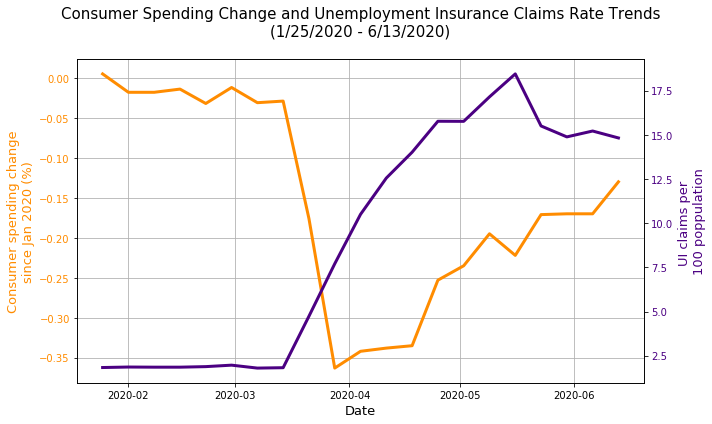

In [84]:
# Plot multiple line chart with different scale to show the trends of consumer spending and unemployment insurance claims over time

# # Create some mock data
# t = np.arange(0.01, 10.0, 0.01)
# data1 = np.exp(t)
# data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('Date', fontsize=13)
ax1.set_ylabel('Consumer spending change\nsince Jan 2020 (%)', color='darkorange', fontsize=13)
ax1.plot(x_axis, total_spending, color='darkorange', linewidth=3)
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='darkorange')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('UI claims per \n100 poppulation', color='indigo', fontsize=13)  # we already handled the x-label with ax1
ax2.plot(x_axis, total_claims_rate, color='indigo', linewidth=3)
ax2.tick_params(axis='y', labelcolor='indigo')

plt.title('Consumer Spending Change and Unemployment Insurance Claims Rate Trends\n(1/25/2020 - 6/13/2020)\n', fontsize=15)

plt.savefig('Images/Q2_CS_UI_Trends')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig('Q2_cs_ui_line.png')
plt.show()

### Observations
* As consumer spending started to decrease in March, unemployment insurance claims rates started to climb
* Consumer spending then began to pick up again around mid-April
* It seems both factors are somewhat negatively correlated but the significance of correlation needs to further examined

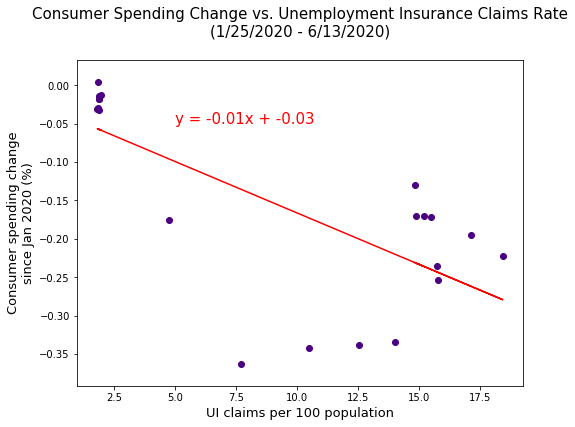

In [85]:
# Scatter plot 1: Consumer spending vs. unemployment insurance claims rate between Jan and Jun / Top 5 states & FL

(slope2, intercept2, rvalue2, pvalue2, stderr2) = stats.linregress(total_claims_rate, total_spending)
regress_values2 = total_claims_rate * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

plt.figure(figsize=(8,6)).tight_layout()
plt.scatter(
    total_claims_rate, total_spending,
    marker='o', 
    facecolors='indigo', 
    edgecolors='indigo',
)
plt.plot(total_claims_rate,regress_values2,"r-")
plt.annotate(line_eq2,(5, -0.05),fontsize=15,color="red")

plt.title('Consumer Spending Change vs. Unemployment Insurance Claims Rate\n(1/25/2020 - 6/13/2020)\n', fontsize=15)
plt.xlabel('UI claims per 100 population', fontsize=13)
plt.ylabel('Consumer spending change\nsince Jan 2020 (%)', fontsize=13)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Images/Q2_cs_uir_scatter.png')
plt.show()

In [86]:
# Spearman correlation coefficient; assumes 2 data sets are not normally distributed
stats.spearmanr(total_claims_rate, total_spending)

SpearmanrResult(correlation=-0.6295092955127416, pvalue=0.0022299142493963186)

In [87]:
# R-sqaured
print(f"R-squared is {rvalue2**2}")

R-squared is 0.4873117004576017


### Observations
* Spearman R is chosen for analysis here as data sets are not normally distributed
* Correlation (-0.6295) is not close to 1 but p-value (0.0022) is much less than 0.05
* Correlation can be considered moderately negative
* The increase in UI claims rate implies a decrease in consumer spending to some degree
* Based on the R-squared, approximately 48% of variance in consumer spending can be explained in the COVID case rate

In [88]:
# Scatter plot 2: Consumer spending vs. unemployment insurance claims rate between March 7 - Apr 11 / Top 5 states & FL
states_mar_apr = clean_cs_uic_df[clean_cs_uic_df.date.between('2020-03-07', '2020-04-11')]
states_mar_apr.head()

,date,statename,case_rate,spend_all,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws,initial_claims,initial_claims_rate,total_claims,total_claims_rate,state_pop2019,total_cases
314,2020-03-07,District Of Columbia,0.1420,-0.024500,-0.12100,-0.1650,0.0651,0.2970,0.1450,-0.271,471,0.1150,7263,1.770,705749,14200
315,2020-03-07,Florida,0.0559,-0.034800,-0.05360,-0.1070,-0.0317,0.0479,-0.0245,-0.194,5325,0.0515,37587,0.364,21477737,5590
327,2020-03-07,Massachusetts,0.1890,0.000994,-0.00621,0.0477,0.0594,0.1070,-0.1020,-0.177,4712,0.1230,80264,2.100,6892503,18900
336,2020-03-07,New Jersey,0.0450,-0.006580,-0.06050,-0.1220,0.0315,0.1260,0.0414,-0.146,7996,0.1780,115642,2.570,8882190,4500
338,2020-03-07,New York,0.4570,-0.031000,-0.06540,-0.1490,-0.0341,0.0814,-0.0547,-0.151,14035,0.1480,175927,1.850,19453561,45700


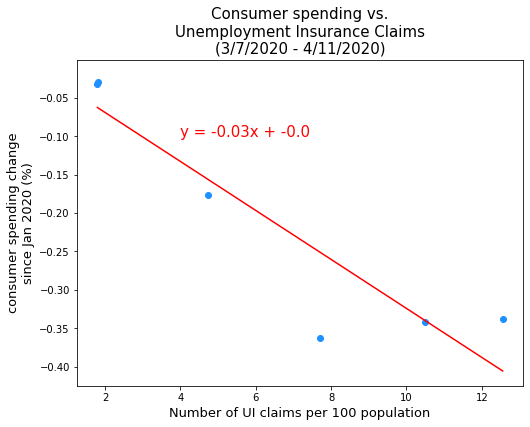

In [89]:
states_cs1 = states_mar_apr.groupby('date')['spend_all'].mean()
states_ui1 = states_mar_apr.groupby('date')['total_claims_rate'].mean()

(slope5, intercept5, rvalue5, pvalue5, stderr5) = stats.linregress(states_ui1, states_cs1)
regress_values5 = states_ui1 * slope5 + intercept5
line_eq5 = "y = " + str(round(slope5,2)) + "x + " + str(round(intercept5,2))

plt.figure(figsize=(8,6))

plt.scatter(
    states_ui1, states_cs1,
    marker='o', 
    facecolors='dodgerblue', 
    edgecolors='dodgerblue')
plt.plot(states_ui1,regress_values5,"r-")
plt.annotate(line_eq5,(4, -0.1),fontsize=15,color="red")

plt.title('Consumer spending vs.\nUnemployment Insurance Claims\n(3/7/2020 - 4/11/2020)', fontsize=15)
plt.xlabel('Number of UI claims per 100 population', fontsize=13)
plt.ylabel('consumer spending change\nsince Jan 2020 (%)', fontsize=13)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Images/Q2_cs_uir_scatter_apr11.png')
plt.show()

In [90]:
# Spearman correlation coefficient; assumes 2 data sets are not normally distributed
stats.spearmanr(states_ui1, states_cs1)

SpearmanrResult(correlation=-0.7142857142857143, pvalue=0.1107871720116617)

In [91]:
# R-squared
print(f'R-squared: {rvalue5**2}')

R-squared: 0.8397737646933969


### Observations
* Correlation (-0.7143) is higher than the analysis done on the whole time frame but p-value (0.1108) is higher than 0.05
* The seemingly moderate/strong negative correlation can be considered statistically significant. This may be due to the relatively small sample size (just 6 states' data over a period of a month)

In [92]:
# Scatter plot 3: Consumer spending vs. unemployment insurance claims rate between Apr 18 - Jun 13 / Top 5 states & FL
states_apr_jun = clean_cs_uic_df[clean_cs_uic_df.date.between('2020-04-18', '2020-06-13')]
states_apr_jun.head()

,date,statename,case_rate,spend_all,spend_acf,spend_aer,spend_apg,spend_grf,spend_hcs,spend_tws,initial_claims,initial_claims_rate,total_claims,total_claims_rate,state_pop2019,total_cases
620,2020-04-18,District Of Columbia,378.0,-0.376,-0.749,-0.705,-0.438,0.152000,-0.486,-0.871,8639,2.11,56104,13.70,705749,37800000
621,2020-04-18,Florida,119.0,-0.211,-0.564,-0.664,-0.389,0.062800,-0.507,-0.694,506670,4.90,683691,6.61,21477737,11900000
633,2020-04-18,Massachusetts,528.0,-0.331,-0.692,-0.797,-0.461,0.033300,-0.524,-0.743,80969,2.12,548521,14.40,6892503,52800000
642,2020-04-18,New Jersey,917.0,-0.303,-0.644,-0.621,-0.489,0.017700,-0.565,-0.729,140139,3.12,696144,15.50,8882190,91700000
644,2020-04-18,New York,1236.0,-0.317,-0.679,-0.802,-0.480,0.000535,-0.601,-0.735,205184,2.16,1559680,16.40,19453561,123600000


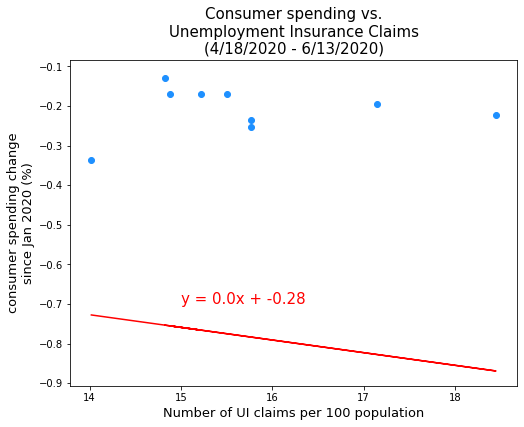

In [93]:
states_cs2 = states_apr_jun.groupby('date')['spend_all'].mean()
states_ui2 = states_apr_jun.groupby('date')['total_claims_rate'].mean()

(slope6, intercept6, rvalue6, pvalue6, stderr6) = stats.linregress(states_ui2, states_cs2)
regress_values6 = states_ui2 * slope5 + intercept6
line_eq6 = "y = " + str(round(slope6,2)) + "x + " + str(round(intercept6,2))

plt.figure(figsize=(8,6))

plt.scatter(
    states_ui2, states_cs2,
    marker='o', 
    facecolors='dodgerblue', 
    edgecolors='dodgerblue')
plt.plot(states_ui2,regress_values6,"r-")
plt.annotate(line_eq6,(15, -0.7),fontsize=15,color="red")

plt.title('Consumer spending vs.\nUnemployment Insurance Claims\n(4/18/2020 - 6/13/2020)', fontsize=15)
plt.xlabel('Number of UI claims per 100 population', fontsize=13)
plt.ylabel('consumer spending change\nsince Jan 2020 (%)', fontsize=13)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Images/Q2_cs_uir_scatter_jun13.png')
plt.show()

In [94]:
# Spearman correlation coefficient; assumes 2 data sets are not normally distributed
stats.spearmanr(states_ui2, states_cs2)

SpearmanrResult(correlation=-0.26666666666666666, pvalue=0.4879222748387009)

In [95]:
# R-squared
print(f'R-squared: {rvalue6**2}')

R-squared: 0.009836891495561896


### Observations
* Correlation (-0.2666) is very low, and much lower than the analysis done on the whole time frame but p-value (0.4879) is lower than 0.05
* Statistically speaking, the negative relationship between the two variables in the post-stimulus check time frame is very low

# Q3: Is there a COVID-19 impact differential in credit/debit card spending between consumer income classes?

In [96]:
# Filter for data as of Jun 17th and sort by descening order
# Identify top 5 states
jun17_df = merge2_df[merge2_df['date'] == '2020-06-17'].sort_values('case_rate',ascending = False)
jun17_top5=jun17_df.iloc[0:5]
jun17_top5_df=pd.DataFrame(jun17_top5)
jun17_top5_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
7427,2020-06-17,2020,6,17,36,2004.0,3.65,-0.420,-0.563,-0.0891,-0.127,-0.0501,-0.0603,-0.1630,0.0962,-0.217,-0.491,New York,NY,19453561
7425,2020-06-17,2020,6,17,34,1888.0,3.79,-0.414,-0.400,-0.0762,-0.107,-0.00771,-0.0377,-0.1850,0.1720,-0.168,-0.525,New Jersey,NJ,8882190
7416,2020-06-17,2020,6,17,25,1540.0,4.13,-0.408,-0.530,-0.0797,-0.108,-0.0259,-0.0254,0.0354,0.0994,-0.243,-0.520,Massachusetts,MA,6892503
7434,2020-06-17,2020,6,17,44,1530.0,6.16,-0.565,-0.420,-0.1980,-0.205,-0.161,-0.2040,-0.1180,0.0079,-0.216,-0.552,Rhode Island,RI,1059361
7403,2020-06-17,2020,6,17,11,1395.0,6.27,-0.569,-0.569,-0.2110,-0.243,-0.0304,-0.2030,-0.1380,0.2120,-0.224,-0.760,District Of Columbia,DC,705749


In [97]:
# Create the top 5 states in COVID-19 case rate
top5_list = jun17_top5_df["statename"].tolist()
top5_list

['New York',
 'New Jersey',
 'Massachusetts',
 'Rhode Island',
 'District Of Columbia']

In [98]:
# Create top 5 states dataframe
top5_df = merge2_df[merge2_df['statename'].isin(top5_list)]
top5_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
8,2020-01-24,2020,1,24,11,0.0,.,-0.00066,0.00528,-0.00252,0.00384,-0.0491,-0.00417,-0.04930,-0.00575,0.1290,0.01150,District Of Columbia,DC,705749
21,2020-01-24,2020,1,24,25,0.0,.,0.02580,-0.04450,-0.00358,-0.00764,-0.0126,0.00507,0.03550,-0.03080,0.0485,-0.03790,Massachusetts,MA,6892503
30,2020-01-24,2020,1,24,34,0.0,.,-0.00736,0.01600,-0.00548,-0.00759,0.00563,-0.00414,-0.00722,-0.02020,-0.0451,0.00592,New Jersey,NJ,8882190
32,2020-01-24,2020,1,24,36,0.0,.,0.00214,-0.03430,-0.00610,-0.00332,0.00127,-0.01040,0.01430,-0.02250,-0.0316,0.06060,New York,NY,19453561
39,2020-01-24,2020,1,24,44,0.0,.,0.04200,1.06000,-0.01900,0.0289,-0.0795,-0.04090,0.06220,-0.04130,0.1790,-0.13200,Rhode Island,RI,1059361


In [99]:
# Create Florida dataframe
fla_df = merge2_df[merge2_df["statename"] == "Florida"]
fla_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
9,2020-01-24,2020,1,24,12,0.0,.,-0.01970,-0.043800,-0.01450,-0.0133,-0.0249,-0.01070,-0.009640,-0.011000,-0.01860,-0.005690,Florida,FL,21477737
60,2020-01-25,2020,1,25,12,0.0,.,-0.01650,-0.024700,-0.01250,-0.0118,-0.0215,-0.00917,-0.007020,-0.009390,-0.01840,-0.004130,Florida,FL,21477737
111,2020-01-26,2020,1,26,12,0.0,.,-0.01590,-0.020300,-0.00959,-0.00767,-0.0176,-0.00700,-0.000504,-0.000045,-0.01510,0.000966,Florida,FL,21477737
162,2020-01-27,2020,1,27,12,0.0,0,-0.00283,0.000203,-0.00378,-0.00858,-0.0147,0.00170,0.019700,0.014200,-0.01170,-0.008940,Florida,FL,21477737
213,2020-01-28,2020,1,28,12,0.0,0,0.00319,0.001730,-0.00160,-0.0105,-0.00789,0.00315,0.013400,0.006050,0.00849,-0.010300,Florida,FL,21477737


In [100]:
# Append national dataframe and florida data frames top 5 dataframe
top5_nat_fla_df = top5_df.append([merge0_df, fla_df], sort=False).reset_index()
del top5_nat_fla_df['index']
top5_nat_fla_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,11,0.0,.,-0.00066,0.00528,-0.00252,0.00384,-0.0491,-0.00417,-0.04930,-0.00575,0.1290,0.01150,District Of Columbia,DC,705749.0
1,2020-01-24,2020,1,24,25,0.0,.,0.02580,-0.04450,-0.00358,-0.00764,-0.0126,0.00507,0.03550,-0.03080,0.0485,-0.03790,Massachusetts,MA,6892503.0
2,2020-01-24,2020,1,24,34,0.0,.,-0.00736,0.01600,-0.00548,-0.00759,0.00563,-0.00414,-0.00722,-0.02020,-0.0451,0.00592,New Jersey,NJ,8882190.0
3,2020-01-24,2020,1,24,36,0.0,.,0.00214,-0.03430,-0.00610,-0.00332,0.00127,-0.01040,0.01430,-0.02250,-0.0316,0.06060,New York,NY,19453561.0
4,2020-01-24,2020,1,24,44,0.0,.,0.04200,1.06000,-0.01900,0.0289,-0.0795,-0.04090,0.06220,-0.04130,0.1790,-0.13200,Rhode Island,RI,1059361.0


# Top 5 Summary Statistics

In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the percentage of change in spending

mean = top5_nat_fla_df.groupby('statename')['spend_all'].mean()
median = top5_nat_fla_df.groupby('statename')['spend_all'].median()
max = top5_nat_fla_df.groupby('statename')['spend_all'].max()
min = top5_nat_fla_df.groupby('statename')['spend_all'].min()
variance = top5_nat_fla_df.groupby('statename')['spend_all'].var()
stdv = top5_nat_fla_df.groupby('statename')['spend_all'].std()
sem = top5_nat_fla_df.groupby('statename')['spend_all'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Max": max, "Min": min,"Variance": variance, 
                           "Standard Deviation": stdv, "SEM": sem})
summary_df

,Mean,Median,Max,Min,Variance,Standard Deviation,SEM
statename,,,,,,,
District Of Columbia,-0.196942,-0.26650,0.0505,-0.398,0.022849,0.151158,0.012510
Florida,-0.097488,-0.07905,0.0072,-0.305,0.007665,0.087550,0.007246
Massachusetts,-0.135034,-0.12450,0.0444,-0.402,0.015233,0.123422,0.010214
National,-0.116990,-0.10000,0.0156,-0.330,0.011018,0.104967,0.008123
New Jersey,-0.128106,-0.12100,0.0209,-0.372,0.013503,0.116200,0.009617
New York,-0.145591,-0.14700,0.0118,-0.376,0.013735,0.117196,0.009699
Rhode Island,-0.239449,-0.27300,0.0198,-0.483,0.022714,0.150711,0.012473


# Top 5 line Chart on precentage of change in consumer spending
* Based on the entire time period


In [102]:
top5_nat_fla_df_daterange = top5_nat_fla_df[(top5_nat_fla_df['date'] > '2020-01-23') & (top5_nat_fla_df['date'] <= '2020-06-17')]
top5_nat_fla_df_daterange.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,11,0.0,.,-0.00066,0.00528,-0.00252,0.00384,-0.0491,-0.00417,-0.04930,-0.00575,0.1290,0.01150,District Of Columbia,DC,705749.0
1,2020-01-24,2020,1,24,25,0.0,.,0.02580,-0.04450,-0.00358,-0.00764,-0.0126,0.00507,0.03550,-0.03080,0.0485,-0.03790,Massachusetts,MA,6892503.0
2,2020-01-24,2020,1,24,34,0.0,.,-0.00736,0.01600,-0.00548,-0.00759,0.00563,-0.00414,-0.00722,-0.02020,-0.0451,0.00592,New Jersey,NJ,8882190.0
3,2020-01-24,2020,1,24,36,0.0,.,0.00214,-0.03430,-0.00610,-0.00332,0.00127,-0.01040,0.01430,-0.02250,-0.0316,0.06060,New York,NY,19453561.0
4,2020-01-24,2020,1,24,44,0.0,.,0.04200,1.06000,-0.01900,0.0289,-0.0795,-0.04090,0.06220,-0.04130,0.1790,-0.13200,Rhode Island,RI,1059361.0


In [103]:
# Select the columns needed to create the line chart
line_plot_df = top5_nat_fla_df_daterange[["date", "statename","spend_all","case_rate"]]
line_plot_df.head()

,date,statename,spend_all,case_rate
0,2020-01-24,District Of Columbia,-0.00252,0.0
1,2020-01-24,Massachusetts,-0.00358,0.0
2,2020-01-24,New Jersey,-0.00548,0.0
3,2020-01-24,New York,-0.00610,0.0
4,2020-01-24,Rhode Island,-0.01900,0.0


In [104]:
# Set 'statename' to be the index for easy referencing of rows
line_plot_df = line_plot_df.set_index("statename")

In [105]:
# Create a list of the dates to use for the x axis
dates = line_plot_df["date"].unique()

C:\Users\felip\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


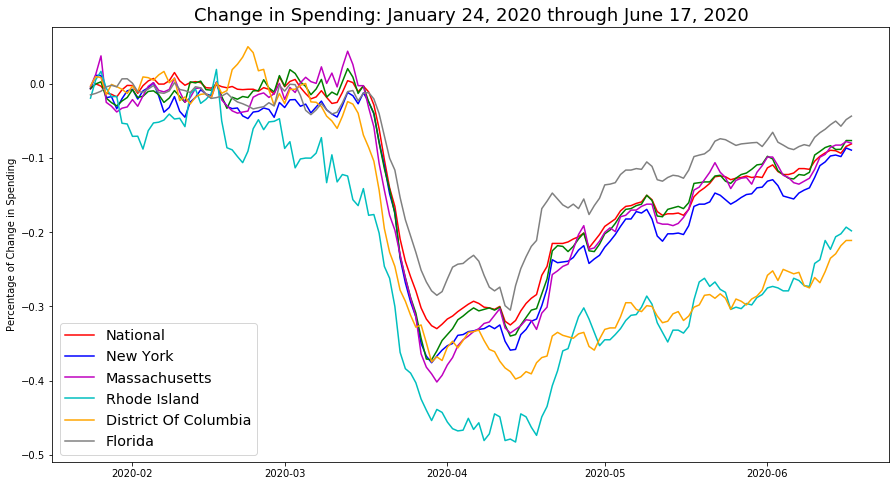

In [106]:
# Set line chart size
plt.figure(figsize=(15,8))

# Plot the the national, each state in the top 5, and fla numbers
nat, = plt.plot(dates, line_plot_df.loc['National',["spend_all"]], 
                color="r",label='National')

ny, = plt.plot(dates, line_plot_df.loc['New York',["spend_all"]], 
               color="b",label='New York')

nj, = plt.plot(dates, line_plot_df.loc['New Jersey',["spend_all"]], 
               color="g",label='New Jersey')

mass, = plt.plot(dates, line_plot_df.loc['Massachusetts',["spend_all"]], 
                 color="m",label='Massachusetts')

ri, = plt.plot(dates, line_plot_df.loc['Rhode Island',["spend_all"]], 
               color="c",label='Rhode Island')

doc, = plt.plot(dates, line_plot_df.loc['District Of Columbia',["spend_all"]], 
                color="orange",label='District Of Columbia')

fla, = plt.plot(dates, line_plot_df.loc['Florida',["spend_all"]], 
                color="gray",label='Florida')

# Set a title for the chart
plt.title("Change in Spending: January 24, 2020 through June 17, 2020", fontsize=18)

ax1 = plt.axes()
#ax1.xaxis.set_label_text('State')
ax1.yaxis.set_label_text('Percentage of Change in Spending')
    
# Create a legend for our chart
plt.legend(handles=[nat, ny, mass, ri, doc, fla], loc="best", fontsize="x-large")

plt.savefig('Images/Q3_cs_line.png')

# Show the chart
plt.show()

# Create a bar chart of the top 5 states and fla with national target line

In [107]:
# Create filtered and reduced df to create bar chart
date_filter = merge2_df[merge2_df["date"] == "2020-06-17"]
reduced_df = date_filter[['statename','spend_all']]
top5_states_spend_df = reduced_df[reduced_df['statename'].isin(top5_list)]
top5_states_spend_df = top5_states_spend_df.rename(columns={"spend_all": "Spending"})
top5_states_spend_df

,statename,Spending
7403,District Of Columbia,-0.2110
7416,Massachusetts,-0.0797
7425,New Jersey,-0.0762
7427,New York,-0.0891
7434,Rhode Island,-0.1980


In [108]:
# Identify the national precentage of change in spending
date_filter = merge0_df[merge0_df["date"] == "2020-06-17"]
date_filter[['statename','spend_all']]
#reduced_df[reduced_df["statename"] == "National"]

,statename,spend_all
148,National,-0.0807


C:\Users\felip\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<function matplotlib.pyplot.show(*args, **kw)>

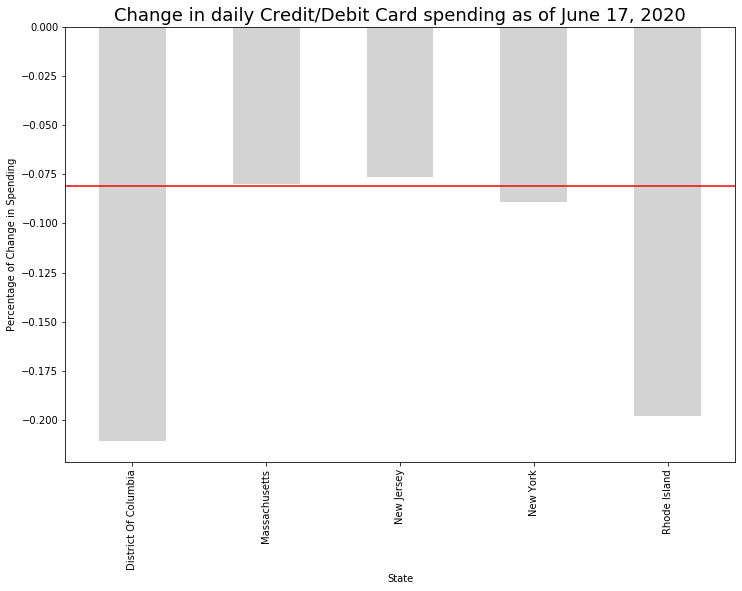

In [109]:
# Plot bar chart
top5_states_spend_df[['statename', 'Spending']].plot(x='statename', color='lightgray', kind='bar', figsize=(12,8))

# Set plot title
plt.title("Change in daily Credit/Debit Card spending as of June 17, 2020", fontsize=18)  

# Set x abdy axis titles
ax1 = plt.axes()
ax1.xaxis.set_label_text('State')
ax1.yaxis.set_label_text('Percentage of Change in Spending')

# Set National percentage of change, as of June 17, as target line
national = -0.0807
ax1.axhline(national, color="r")

#Remove legend from plot
plt.gca().get_legend().remove()

plt.savefig('Images/Q3_cs_bar_jun17.png')

# Plot bar chart
plt.show

# Income Class Spending Line Chart

In [110]:
# Create national df based on date range
nat_df_daterange = merge0_df[(merge0_df['date'] >= '2020-01-24') & (merge0_df['date'] <= '2020-06-17')]
nat_df_daterange.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
3,2020-01-24,2020,1,24,0,National,0.000609,.,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
4,2020-01-25,2020,1,25,0,National,0.000914,.,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839
5,2020-01-26,2020,1,26,0,National,0.001520,.,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720
6,2020-01-27,2020,1,27,0,National,0.001520,0.000174,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700
7,2020-01-28,2020,1,28,0,National,0.001520,0.000174,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870


In [111]:
# Select the columns needed to create the line plot
nat_incclass_df = nat_df_daterange[["date", "case_rate","spend_all" ,"spend_all_inchigh","spend_all_incmiddle","spend_all_inclow"]]
nat_incclass_df.head()

,date,case_rate,spend_all,spend_all_inchigh,spend_all_incmiddle,spend_all_inclow
3,2020-01-24,0.000609,-0.006440,-0.005790,-0.00654,-0.00752
4,2020-01-25,0.000914,0.000432,-0.000625,0.00199,-0.00201
5,2020-01-26,0.001520,-0.002710,-0.000425,-0.00315,-0.00668
6,2020-01-27,0.001520,-0.012200,-0.011000,-0.01190,-0.01590
7,2020-01-28,0.001520,-0.013700,-0.013300,-0.01320,-0.01630


In [112]:
# Printing the high income class max and min 
inchigh_max = nat_incclass_df['spend_all_inchigh'].max()
inchigh_min = nat_incclass_df['spend_all_inchigh'].min()

print(f'High Income max {inchigh_max}')
print(f'High Income min {inchigh_min}')


High Income max 0.0255
High Income min -0.364


In [113]:
# Set the 'statename' to be the index for easy referencing of rows
nat_incclass_df = nat_incclass_df.set_index("date")

In [114]:
# Create a list of the dates to use for the x axis
dates = nat_df_daterange['date'].unique()

C:\Users\felip\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


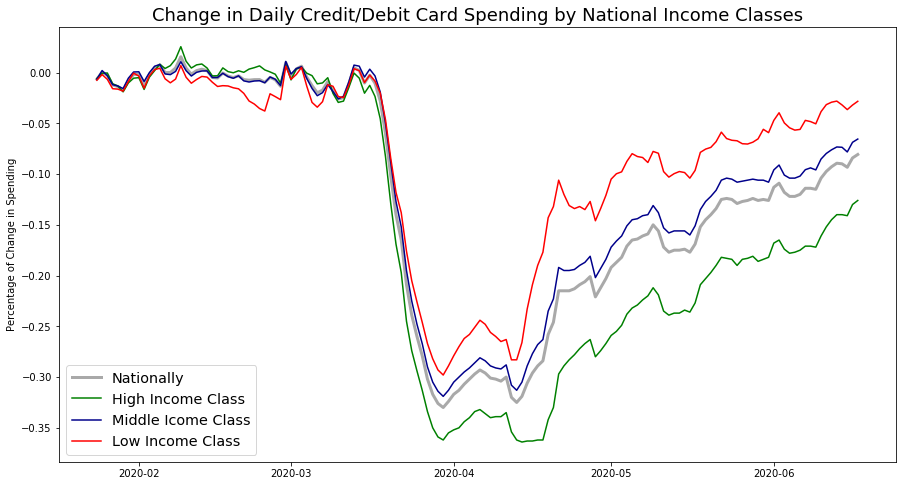

In [115]:
# Set line chart size
plt.figure(figsize=(15,8))

# Plot the national income classes
nat, = plt.plot(dates, nat_incclass_df.loc[:,["spend_all"]], 
                color="darkgray",label='Nationally', linewidth=3.0)

high, = plt.plot(dates, nat_incclass_df.loc[:,["spend_all_inchigh"]], 
                color="g",label='High Income Class')

middle, = plt.plot(dates, nat_incclass_df.loc[:,["spend_all_incmiddle"]], 
               color="darkblue",label='Middle Icome Class')

low, = plt.plot(dates, nat_incclass_df.loc[:,["spend_all_inclow"]], 
               color="r",label='Low Income Class')

# Set x abdy axis titles
ax1 = plt.axes()
ax1.yaxis.set_label_text('Percentage of Change in Spending')


# Set a title for the chart
plt.title("Change in Daily Credit/Debit Card Spending by National Income Classes", fontsize=18)    
    
# Create a legend for our chart
plt.legend(handles=[nat, high, middle, low], loc="best", fontsize='x-large')

plt.savefig('Images/Q3_cs_incclass_line.png')

# Show the chart
plt.show()

The correlation between both factors is -0.54
R-squared is: 0.162151


SpearmanrResult(correlation=-0.5437759763719036, pvalue=1.3141917186117054e-12)

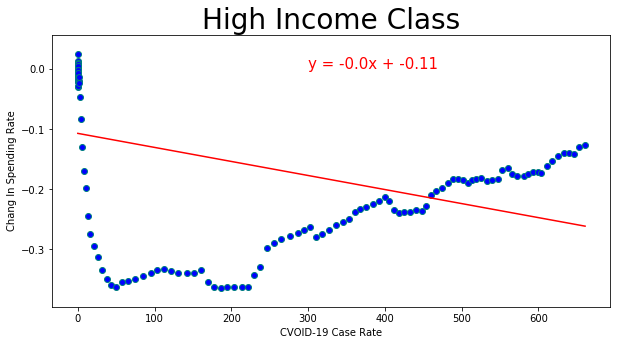

In [116]:
# High Income Correlation
x_values = nat_incclass_df.iloc[:,0]
y_values = nat_incclass_df.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, marker='o', facecolors='b', edgecolors='teal')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(300,0),fontsize=15,color="red")
plt.title('High Income Class', fontsize=28)
plt.xlabel('CVOID-19 Case Rate')
plt.ylabel('Chang In Spending Rate')

correlation = stats.spearmanr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'R-squared is: {round(rvalue**2,6)}')
plt.savefig('Images/Q3_inchigh_correlation.png')

correlation

The correlation between both factors is -0.52
R-squared is: 0.051201


SpearmanrResult(correlation=-0.523420764007749, pvalue=1.2143803353872137e-11)

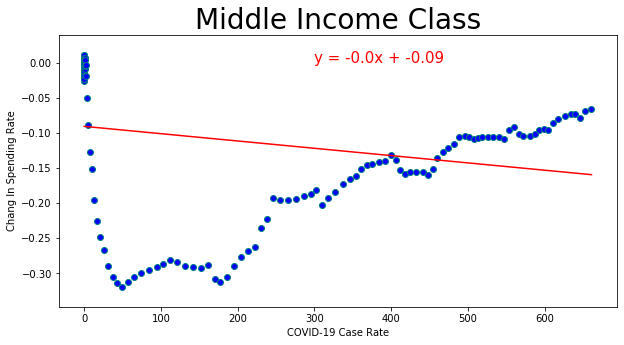

In [117]:
# Middle Income Correlation
x_values = nat_incclass_df.iloc[:,0]
y_values = nat_incclass_df.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, marker='o', facecolors='b', edgecolors='teal')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(300,0),fontsize=15,color="red")
plt.title('Middle Income Class', fontsize=28)
plt.xlabel('COVID-19 Case Rate')
plt.ylabel('Chang In Spending Rate')

correlation = stats.spearmanr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'R-squared is: {round(rvalue**2,6)}') 
plt.savefig('Images/Q3_incmid_correlation.png')
correlation

The correlation between both factors is -0.5
R-squared is: 0.000327


SpearmanrResult(correlation=-0.49534548372744364, pvalue=2.0670504999130545e-10)

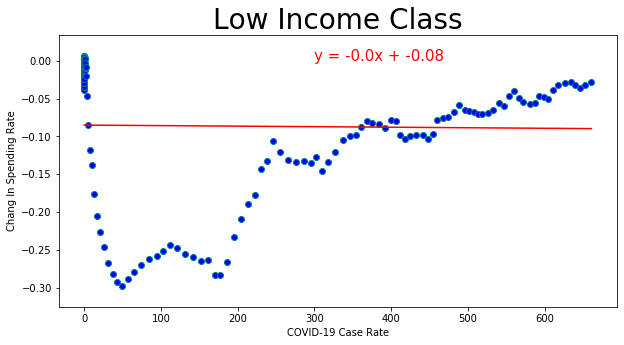

In [118]:
# Low Income Correlation
x_values = nat_incclass_df.iloc[:,0]
y_values = nat_incclass_df.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, marker='o', facecolors='b', edgecolors='teal')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(300,0),fontsize=15,color="red")
plt.title('Low Income Class', fontsize=28)
plt.xlabel('COVID-19 Case Rate')
plt.ylabel('Chang In Spending Rate')

correlation = stats.spearmanr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'R-squared is: {round(rvalue**2,6)}') 
plt.savefig('Images/Q3_inclow_correlation.png')
correlation